# 프로젝트

**프로젝트 제출 루브릭**

| 평가 기준 | 달성 여부 및 설명 |
|-----------|--------------------|
| U-Net을 통한 세그멘테이션 작업이 정상적으로 진행되었는가?| KITTI 데이터셋 구성, U-Net 모델 훈련, 결과물 시각화의 한 사이클이 정상 수행되어 세그멘테이션 결과 이미지를 제출하였다. |
| U-Net++ 모델이 성공적으로 구현되었는가?| U-Net++ 모델을 스스로 구현하여 학습 진행 후 세그멘테이션 결과까지 정상 진행되었다. |
| U-Net과 U-Net++ 두 모델의 성능이 정량적/정성적으로 잘 비교되었는가?| U-Net++ 의 세그멘테이션 결과 사진과 IoU 계산치를 U-Net과 비교하여 우월함을 확인하였다. |

## 데이터 설명
KITTI 데이터셋을 사용할 것이다.
Task로는 Semantic Segmentation을 진행할 것이다.

다만 train/test 각각 200장씩 존재한다. 즉, 데이터가 굉장히 적다.
[KITTI Segmentation Dataset](https://www.cvlibs.net/datasets/kitti/eval_semantics.php)

## SemanticKITTI 클래스

| ID | 클래스 이름 (Class Name) | 설명 |
|----|---------------------------|----------------------------------------|
| 0  | Unlabeled                 | 라벨링 되지 않음 (배경 등)              |
| 1  | Ego Vehicle               | 자아 차량 (내 차)                       |
| 2  | Rectification Border      | 보정 테두리                             |
| 3  | Out of ROI                | 관심 영역 밖                            |
| 4  | Static                    | 정적 물체                               |
| 5  | Dynamic                   | 동적 물체                               |
| 6  | Ground                    | 기타 지면                               |
| 7  | Road                      | 도로 (주행 가능 영역)                   |
| 8  | Sidewalk                  | 인도 (보행자 도로)                      |
| 9  | Parking                   | 주차장                                  |
| 10 | Rail track                | 철로                                     |
| 11 | Building                  | 건물                                     |
| 12 | Wall                      | 벽                                      |
| 13 | Fence                     | 울타리                                  |
| 14 | Guard rail                | 가드레일                                |
| 15 | Bridge                    | 다리                                    |
| 16 | Tunnel                    | 터널                                    |
| 17 | Pole                      | 전신주/기둥                              |
| 18 | Polegroup                 | 기둥 그룹                               |
| 19 | Traffic Light             | 신호등                                   |
| 20 | Traffic Sign              | 교통 표지판                             |
| 21 | Vegetation                | 식물 (나무, 수풀)                        |
| 22 | Terrain                   | 지형 (잔디, 흙 등)                      |
| 23 | Sky                       | 하늘                                    |
| 24 | Person                    | 사람 (보행자)                            |
| 25 | Rider                     | 라이더 (자전거/오토바이 탑승자)          |
| 26 | Car                       | 승용차                                  |
| 27 | Truck                     | 트럭                                     |
| 28 | Bus                       | 버스                                     |
| 29 | Caravan                   | 카라반                                  |
| 30 | Trailer                   | 트레일러                                |
| 31 | Train                     | 기차                                    |
| 32 | Motorcycle                | 오토바이                                |
| 33 | Bicycle                   | 자전거                                  |


## SemanticKITTI 클래스 그룹화 요약
실제 루브릭에서는 도로냐 아니냐 이진 분류였지만, 다중 class 분류로 진행하고자 한다.   
다만 train 이미지가 200장이고, 훑어보니 특정 class만 다수 보였다.  
자연풍경과 도로가 절대다수이고, 차량도 많다. train 이미지가 굉장히 적기에, 특정 class 4개와 Background로 해서 5개 class로만 그룹화를 진행해보았다.

| 그룹 ID | 그룹 이름 | 포함된 클래스 | 클래스 ID 목록 |
|--------|-----------|-----------------------------|-----------------------------|
| 0 | Background | 그외 | [그외] |
| 1 | Vehicle | Ego Vehicle, Car, Truck, Bus, Caravan, Trailer, Train, Motorcycle, Bicycle | [1, 26, 27, 28, 29, 30, 31, 32, 33] |
| 2 | Nature | Vegetation, Terrain | [21, 22] |
| 3 | Safety | Guard rail, Traffic Light, Traffic Sign | [14, 19, 20] |
| 4 | Road | Road | [7] |

## 사용하는 Model
1. U-Net -> Standard_UNet
2. U-Net++ - deep_supervision=False -> NestedUNet_v1
3. U-Net++ - deep_supervision=True -> NestedUNet_v2

## Loss
Dice coef + BCE

Dice coef : Dice coef를 포함하면 예측과 실제의 겹침을 직접 최적화할 수 있어 분할 성능 향상과 함께, Deep Supervision으로 여러 레벨을 안정적으로 학습 가능하다고 한다.
## Metric
1. Acc
2. mIoU - Interior Metric
3. Boundary IoU - Boundary Metric (뒤늦게 추가하느라, 앞 회고에는 미적용)
    - [Boundary loss for highly unbalanced segmentation](https://arxiv.org/pdf/1812.07032)
    - 본 논문에서는 Boundary IoU를 Metric으로 사용할 경우, 기존 Region Loss + Boundary Loss를 해야 성능이 좋아진다고 함
    - 뒤늦게 알게 되어서, Boundary Loss를 추가하진 못하고 단순 점수만 봄

## Data augmentation
실제 있을법한 간단한 aug 세가지로만 우선 진행
1. HorizontalFlip
2. RandomSizedCrop
3. RandomBrightnessContrast

## Data Oversampling
- 현 aug방식은 학습이 돌아가면서, 한 epoch마다 aug가 적용됨
- 그래서 단순히 train image를 두배로 뻥튀기하고, 각 epoch마다 aug가 적용되어, 한 image에 확률상 다른 aug가 적용되게끔 진행
- 이건 적용한 경우와 안하는 경우 진행해봄

## 속도 및 메모리 절약
1. AMP: Automatic Mixed Precision
    - 필요한 곳에는 float32를 쓰고, 덜 중요한 곳에는 float16 (16비트)를 섞어서(Mixed) 사용하는 기술
    - 성능에는 거의 영향을 안끼치면서, 속도를 높여줌 (U-Net++ 1epoch 기준 80초대에서 50초대로 줄여줌)
2. Gradient Accumulation
    - 하드웨어 한계로 인해 Batch Size=1로 학습해야함
    - 가중치 업데이트를 매번 하지 않고, 몇 번 참았다가 한꺼번에 하는 행위 (4로 두면, Batch Size=1이지만, Batch Size=4인 것처럼)
    - 다만 심한 과대적합과 성능의 변화가 심하여 제외함.

---

Learning Rate와 Augmentation과 Oversampling으로만 조합을 섞어서 진행해보았다.     
Resolution도 비율에 맞춰서 늘려볼까, 평균 계산을 해보며 비율을 계산해보았지만 적용하지는 못했다.   

---

## Base Line
- Aug 세가지 적용
- Adam - lr = 0.001
- Batch Size=1
- resolution = 224, 224

| Model         | Best Epoch | Val Loss | Val Acc | Val IoU |
| ------------- | ---------- | -------- | ------- | ------- |
| Standard_UNet | 89         | 1.0014   | 0.8120  | 0.5281  |
| NestedUNet_v1 | 91         | **0.9289**   | 0.8217  | 0.5463  |
| NestedUNet_v2 | 86         | 0.9885   | **0.8363**  | **0.5562**  |

---

## Base Line + Data Oversampling

| Model         | Best Epoch | Val Loss | Val Acc | Val IoU |
| ------------- | ---------- | -------- | ------- | ------- |
| Standard_UNet | 77         | **0.7724**   | 0.8562  | **0.5931**  |
| NestedUNet_v1 | 62         | 0.7982   | **0.8605**  | 0.5910  |
| NestedUNet_v2 | 60         | 0.9340   | 0.8516  | 0.5816  |

---


## Base Line + lr=0.0001 + No_Aug

본 실험에서 Val Loss를 Best Model이라고 기준을 잡았을 경우, U-Net++은 오히려 Augmentation을 미적용했을 때가 Loss는 낮고, acc & IoU & Boundary IoU가 높게 측정되었다.

| Model         | Best Epoch | Val Loss | Val Acc | Val IoU | Val BIoU|
| ------------- | ---------- | -------- | ------- | ------- |------- |
|Standard_UNet| 47 | 0.7476 | 0.8776 | 0.6498 | 0.5189 | 
|NestedUNet_v1| 42 | 0.6956 | 0.8942 | **0.6789** | **0.5652**|
|NestedUNet_v2| 29 | **0.6662** | **0.8928** | 0.6658 | 0.5394 |

NestedUNet_v1   
Train Loss는 전체적으로 우하향중이다. 20epoch까지는 큰 기울기로 하락하고, 60epoch까지도 정상적으로 하락한다. 60epoch부터는 100epoch까지 세번정도가 loss가 급격히 증가하는 현상이 생긴다. 그럼에도 어느정도는 하락하는 추세이다.   
Val loss는 20epoch까지는 하락하는 추세를 보인다. 물론 굉장히 불안정하고 등락을 반복한다. 20epoch부터 65epoch까지 불안정하게, 특정 수치에서 머무는 현상이 나오고, 60epoch부터도 똑같이 불안정하지만, 증가하는 추세가 보인다.   

Acc와 IoU, BIoU도 마찬가지로 train은 20epoch까지는 급등하며, 40epoch까지도 증가하는 추세를 보인다. 40epoch부터는 기울기가 낮아지며 천천히 증가를 하고, 60epoch부터는 Loss처럼 3번정도 수치가 떨어지는 현상이 발생한다. 다만 Train에 비해 Val의 간극이 커서 Metric자체는 다른 실험보다 클지라도, 과적합되었다고 볼 수 있을 거 같다.  

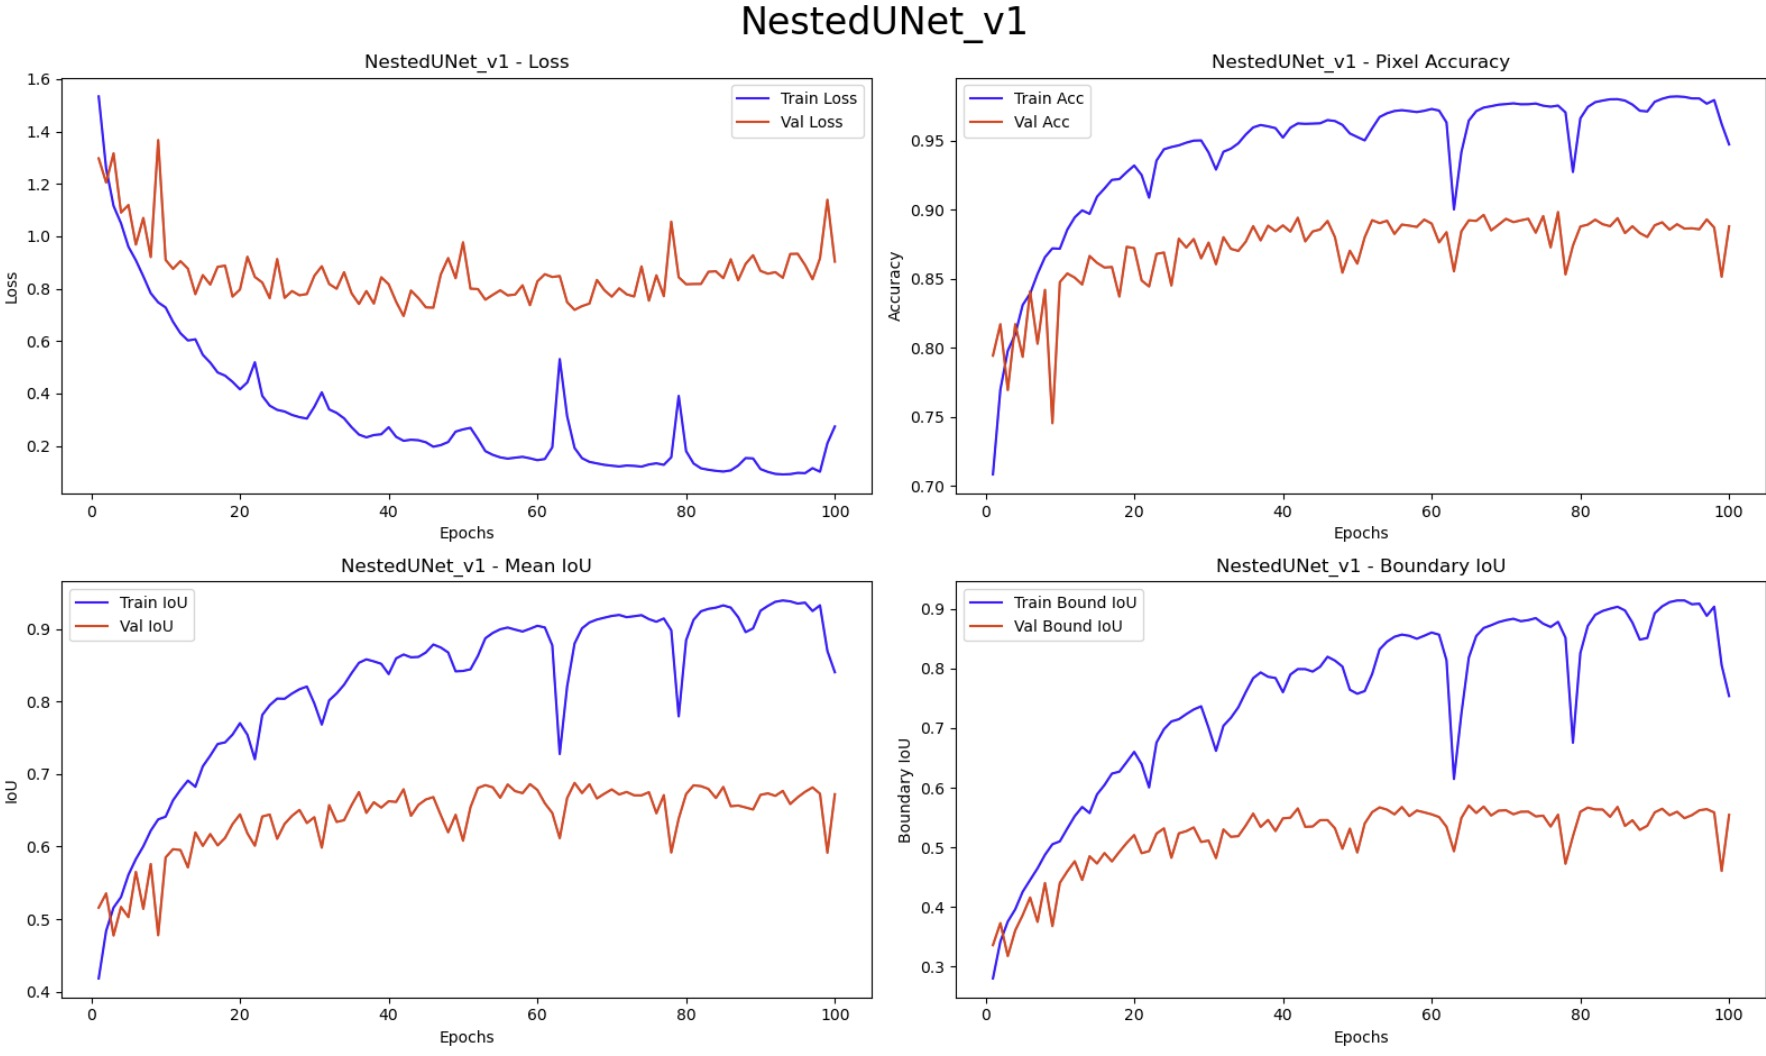

NestedUNet_v2   
Train은 꾸준히 하락하는 추세이다. 20epoch까지는 높은 기울기로 하락하고, 그 이후는 꾸준히 하락 중이다.   
다만 valid는 20epoch까지는 하락을 하다가, 그 이후부터는 불안정하게 등락을 반복하며 하락하는 추세를 보이지 않는다.  

마찬가지로 Augmentation이 적용되지 않았기에, train과 valid의 간극 차이가 커서 과적합이지 않을 까 한다.  

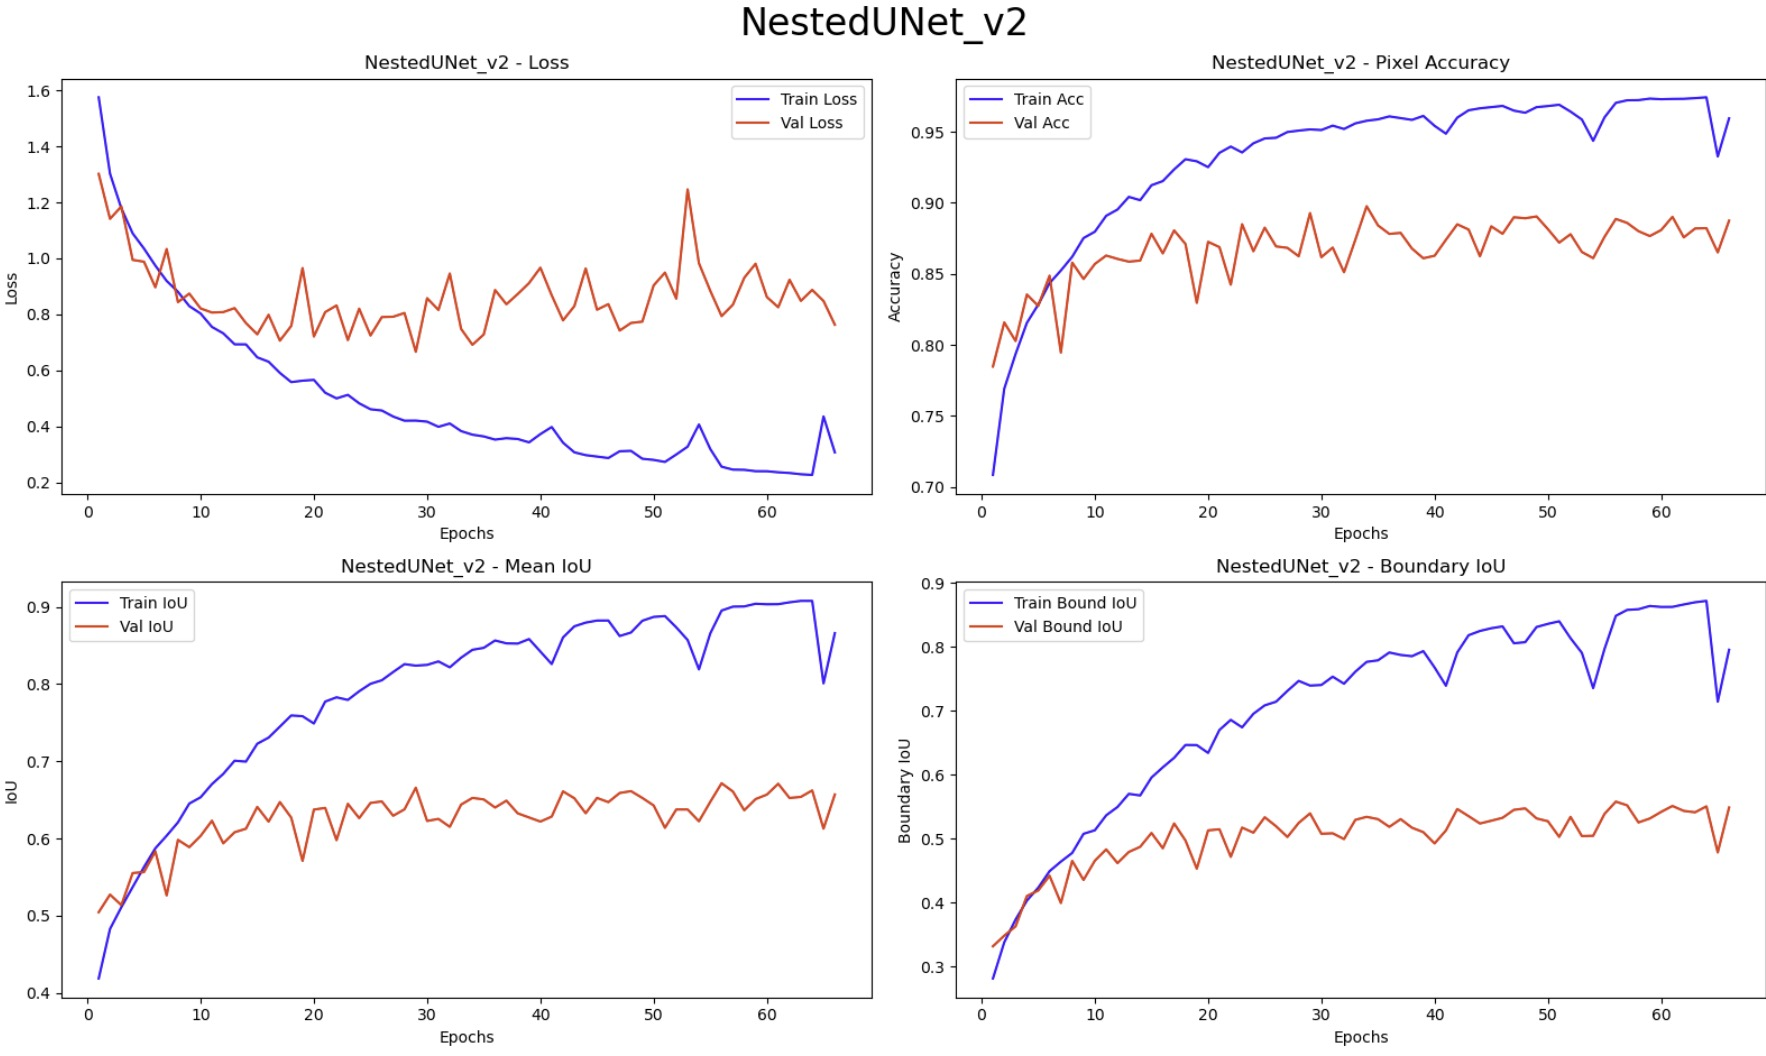

---

## Base Line + lr=0.0001
| Model         | Best Epoch | Val Loss | Val Acc | Val IoU | Val BIoU|
| ------------- | ---------- | -------- | ------- | ------- |------- |
|Standard_UNet|96|**0.7533**|0.8677|0.6059| 0.4732|
|NestedUNet_v1|92|0.8070|0.8603|0.6142|0.4753|
|NestedUNet_v2|78|0.7594|**0.8756**|**0.6450**|**0.5002**|

---

## Base Line + lr=0.0001 + Data Oversampling
| Model         | Best Epoch | Val Loss | Val Acc | Val IoU | Val BIoU|
| ------------- | ---------- | -------- | ------- | ------- |------- |
|Standard_UNet|88|**0.5938**|**0.9033**|0.6512|0.5286|
|NestedUNet_v1|82|0.7418|0.8718|0.6346|0.4978|
|NestedUNet_v2|93|0.6891|0.8880|**0.6586**|**0.5463**|

Standard_UNet   
Val Loss가 다른 실험과 모델들에 비해 가장 낮은 수치이다. 다만 Metric은 그렇지 않다.   
Loss는 train과 valid 둘다 비슷한 경향을 보인다.    
10epoch까지는 급락을 하고 있으며, 이후부터는 꾸준히 천천히 하락하는 추세를 보인다. 다만 train에는 Data Oversampling을 한 번 거쳤으며, Data Augmentation이 적용되었다. 그래서 90epoch까지는 val이 train보다 loss가 더 낮은 현상을 보인다.    

다만 수렴하지 않고 끝난 것으로 보여진다.   

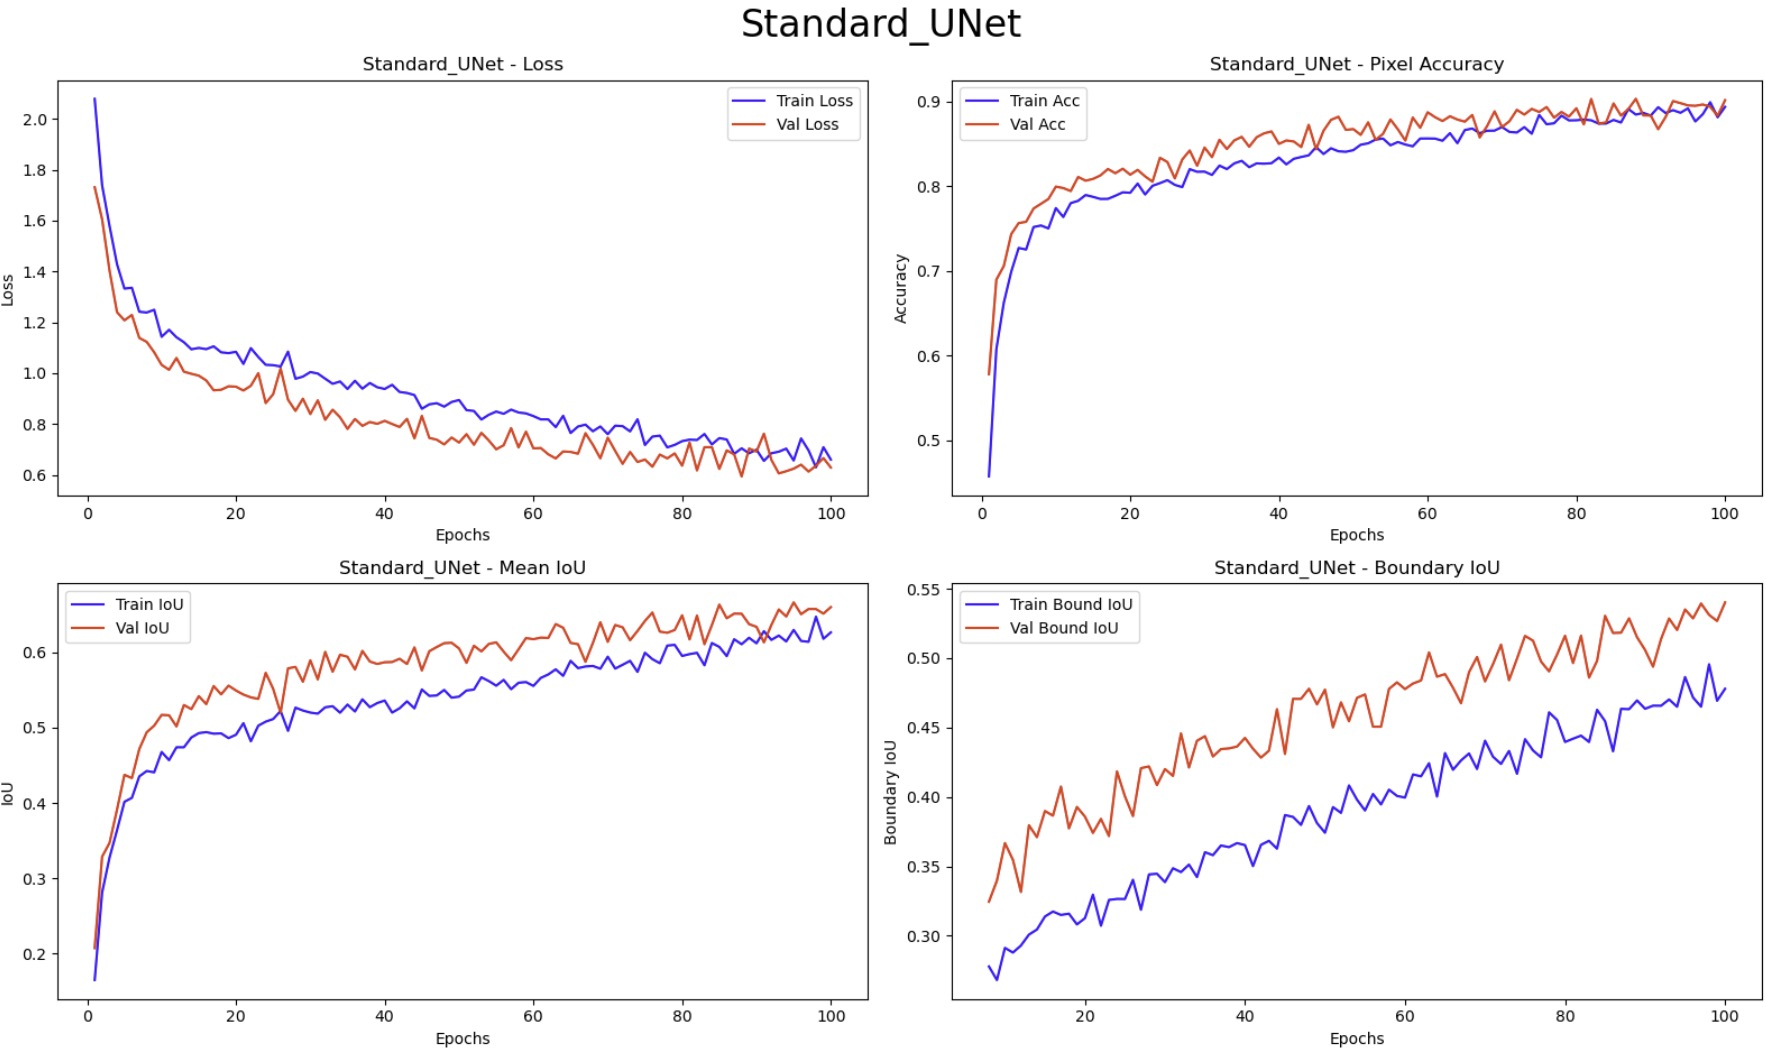

---

| Model         | Best Epoch | Val Loss | Val Acc | Val IoU | Val BIoU| 비고 |
| ------------- | ---------- | -------- | ------- | ------- |------- | ------ |
|Standard_UNet|88|**0.5938**|**0.9033**|0.6512|0.5286| Base Line + lr=0.0001 + Data Oversampling |
|NestedUNet_v1| 42 | 0.6956 | 0.8942 | **0.6789** | **0.5652**| Base Line + lr=0.0001 + No_Aug |
|NestedUNet_v2| 29 | 0.6662 | 0.8928 | 0.6658 | 0.5394 | Base Line + lr=0.0001 + No_Aug |

Nature, Background 순으로 실제 이미지에서 차지하는 부분이 많아서 그런지, 다른 class에 비해서 초기 학습(5~10epoch)부터 높은 수치를 보여준다. 다만 Nature는 초기 학습 이후에는 오르는 추세를 보이질 않고, Background는 꾸준히 낮은 기울기로 증가하는 추세를 보인다.  

Road는 5epoch까지 metric에서 급등하는 추세를 보이다가, Nature처럼 그 수치에서 머물거나, 굉장히 천천히 오르는 추세가 보인다.  
Vehicle은 Road와 비슷한 경향을 띄우지만 Nature보다는 뒤늦게 10epoch쯤부터 급등하는 현상을 보인다. 그 이후부터는 천천히 오르는 추세를 보인다.   

다만 Valid는 굉장히 불안정하게 급등락을 반복하며, epoch가 뒤로 갈수록 어느정도 안정이 되가는 거 같다.   

다만 Safety 같은 경우, 이미지에서 존재하더라도 크기가 매우 작아 구분하기 힘들어하는 것으로 보여진다.   
40epoch까지는 전혀 분류를 하지 못하는 현상을 보이고, 40epoch이후부터는 어느정도 오르는 추세를 보이지만, 나머지 4 class에 비해서는 굉장히 떨어지는 성능을 보인다.   

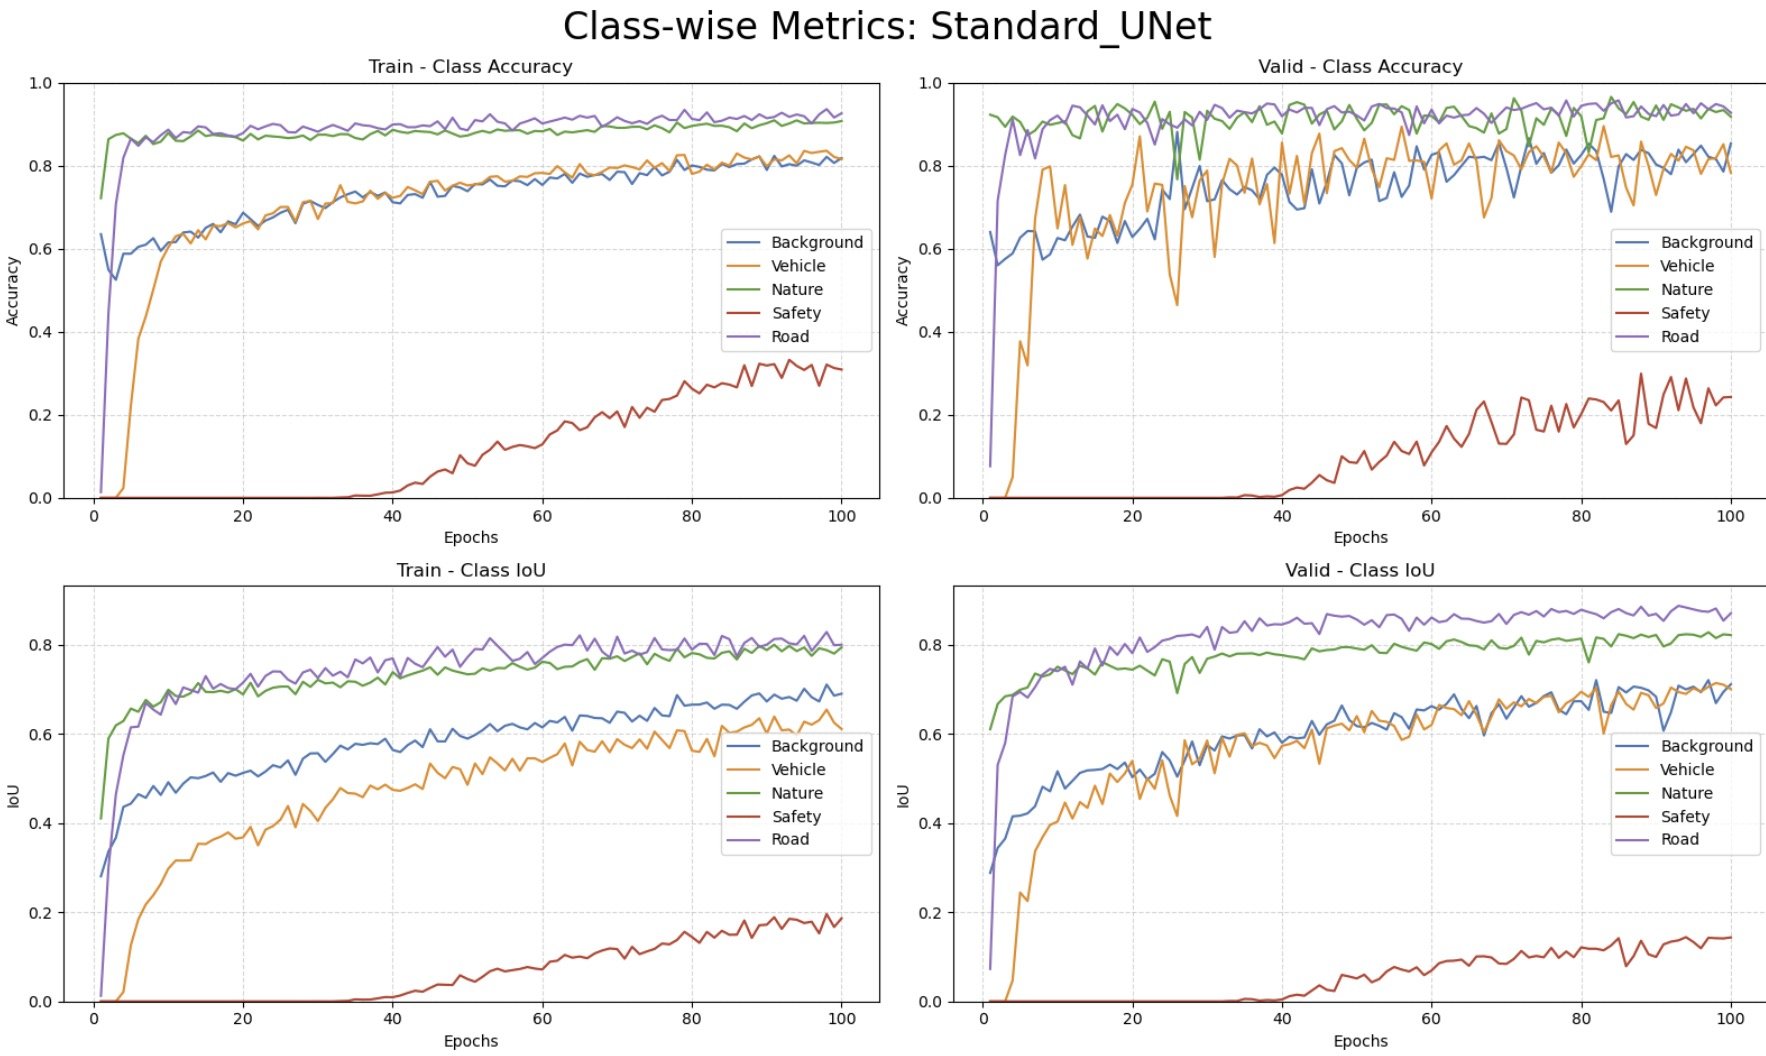


U-Net에 비해서, Raod, Nature, Vehicel, Background 순으로 초기 0~3epoch부터 높은 수치에서 시작하여 급등하는 현상이 보인다.   
그리고 24epoch까지는 어느정도 증가하는 추세가 눈에 띄며, 이후부터는 추세가 굉장히 약하며, 중간중간에 급락하는 현상도 보인다.(Loss와 비슷)   

다만 여기서도 Safety도 다른 4개 class보다는 낮지만, 3epoch부터 인식하여 분류하여 증가하는 추세를 보인다.  

valid도 train과 비슷한 경향을 띄우지만, train에 비해서 수치는 다소 떨어지는 과적합현상처럼 보인다.    
특히 safety같은 경우에는 train에서는 다른 4개 class와 간극을 계속 줄여가며 비슷해지지만, valid에서는 20epoch까지만 증가하고, 이후부터는 특정 수치에서 머무는 현상이 보인다.   

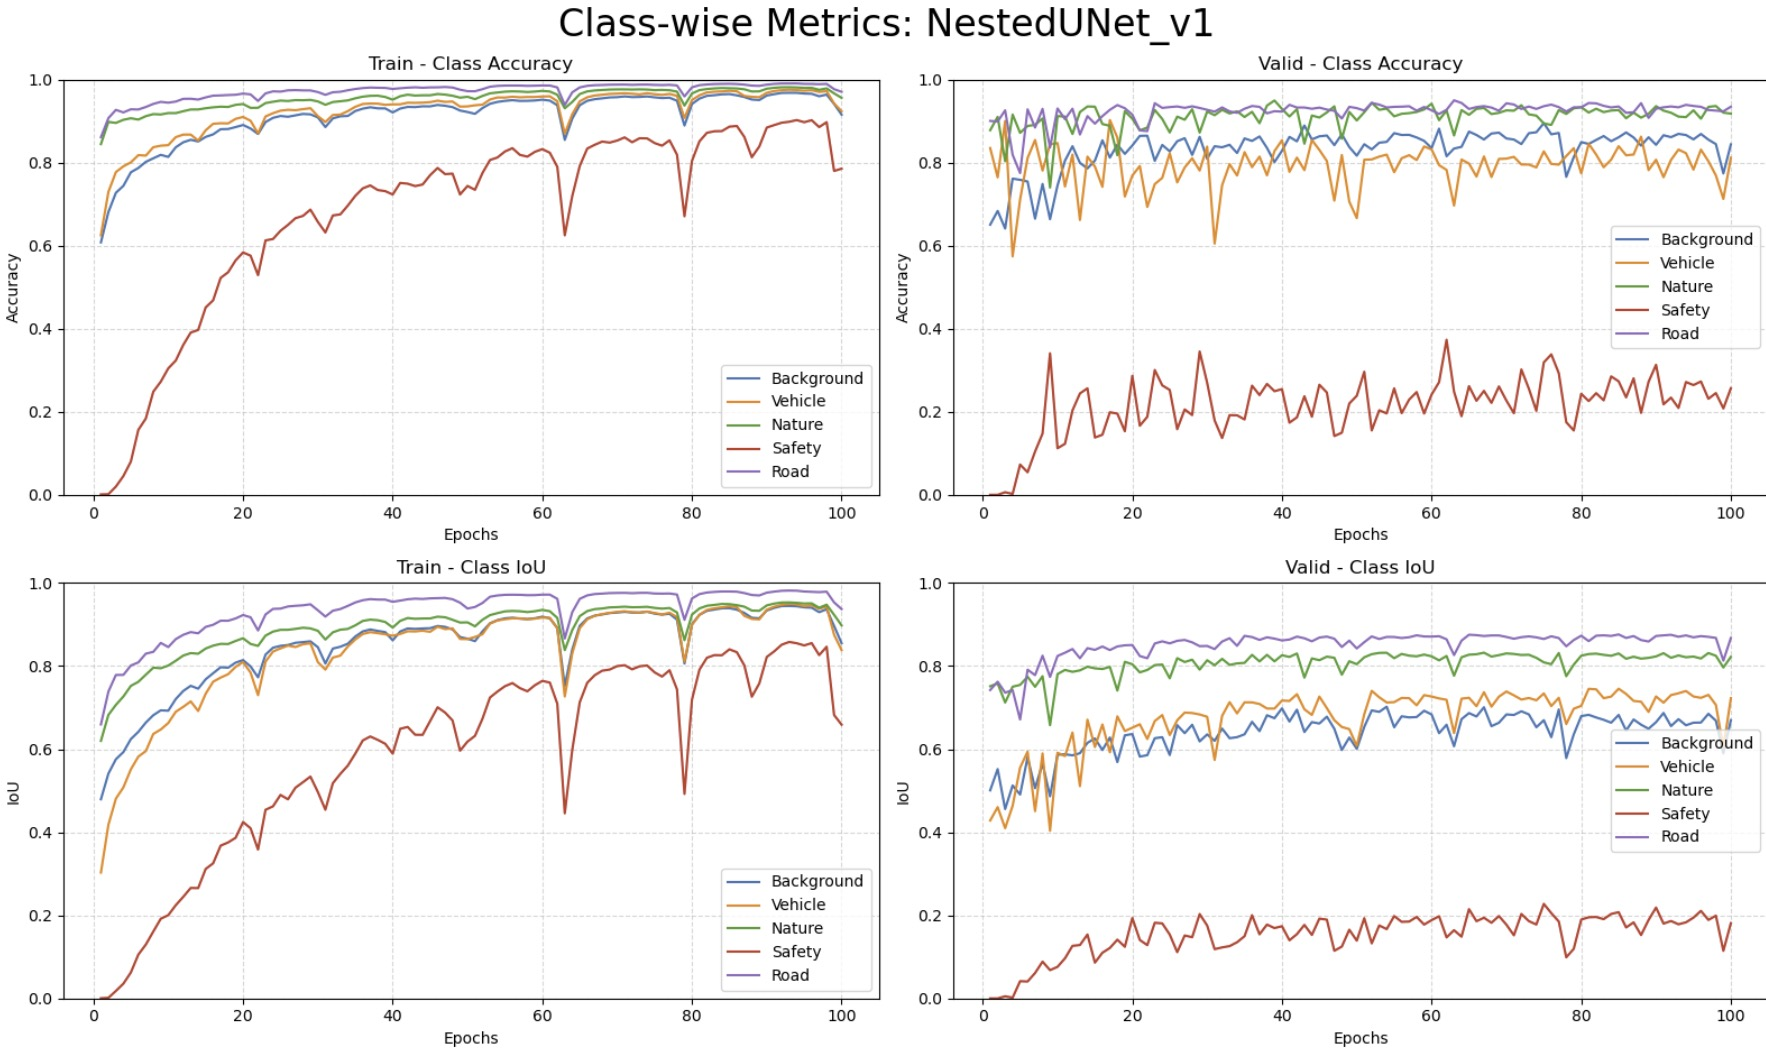




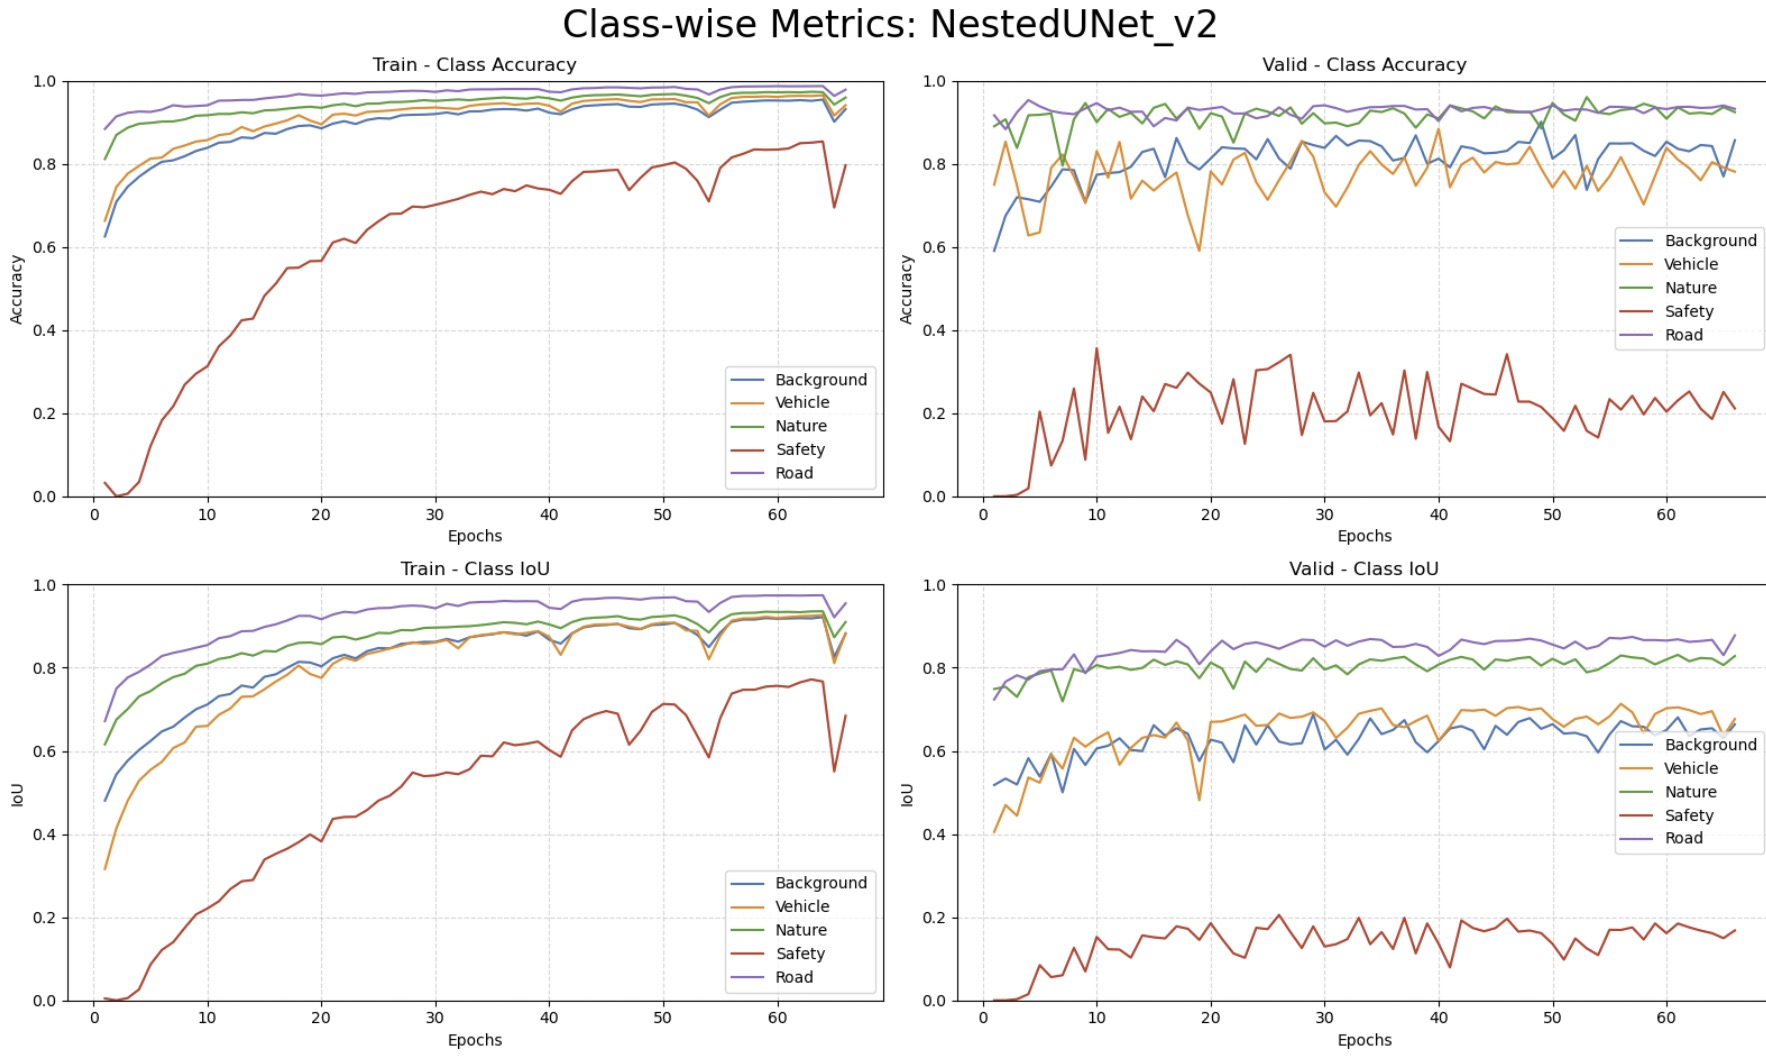

---

* **Background → 검정**
* **Vehicle → 보라**
* **Nature → 초록**
* **Safety → 노랑**
* **Road → 빨강**


---
Train 이미지 중 하나   

위 성능에서 보듯이, U-Net은 loss가 가장 낮았지만 metric에서는 U-Net++ 이 좀더 높은 것을 볼 수 있었다.  
뿐만아니라 class-wise metric을 볼때, safety class 인식율이 U-Net++ 계열이 더 좋은 것을 확인가능하다.  
아래 이미지에서는 표지판과 신호등 외에는 존재하지 않지만, U-Net에서는 Background에 있는 건물 일부에 safety로 인식하는 현상이 보인다.   

세 모델 전부 Road는 잘 인식하는 것을 볼 수 있다.   

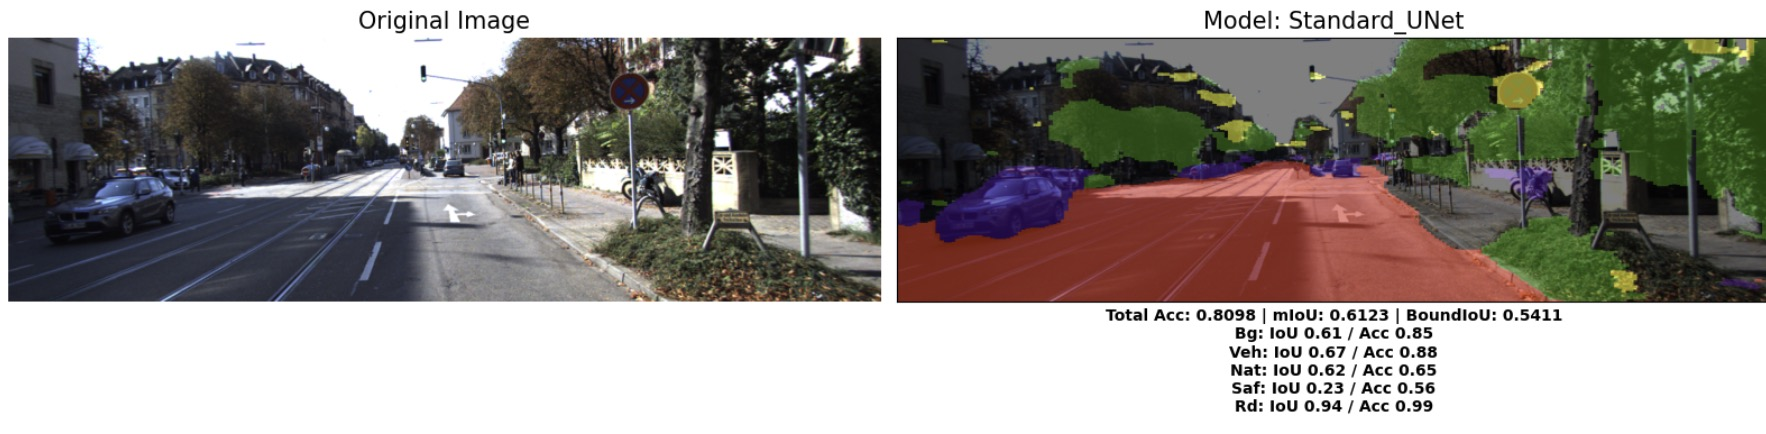
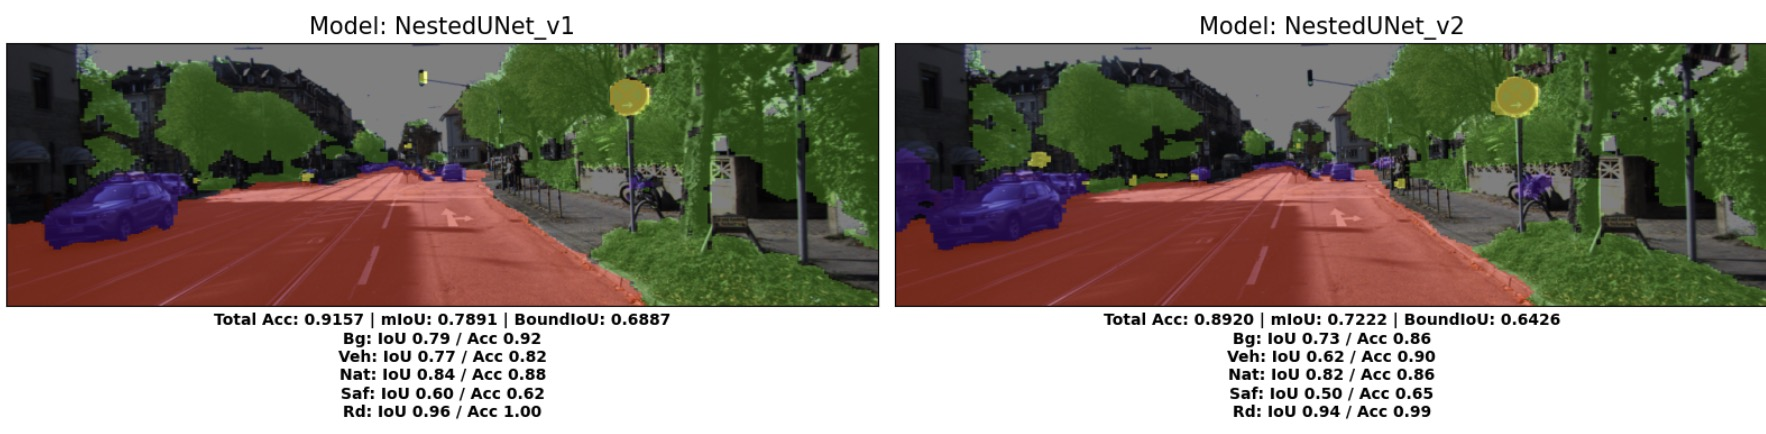

---

Valid 이미지 중 하나   

valid 이미지에서는 세모델 전부 Safety를 전혀 인식하지 못한다. 마찬가지로 Road는 인식을 잘 한다.   

다만 U-Net++에서 Acc, IoU는 높지만, BIoU는 U-Net에 비해서 낮은것은 큰 구조 영역은 잘 맞추지만 경계부분이 다소 떨어진다라고 볼 수 있을 거 같다.  

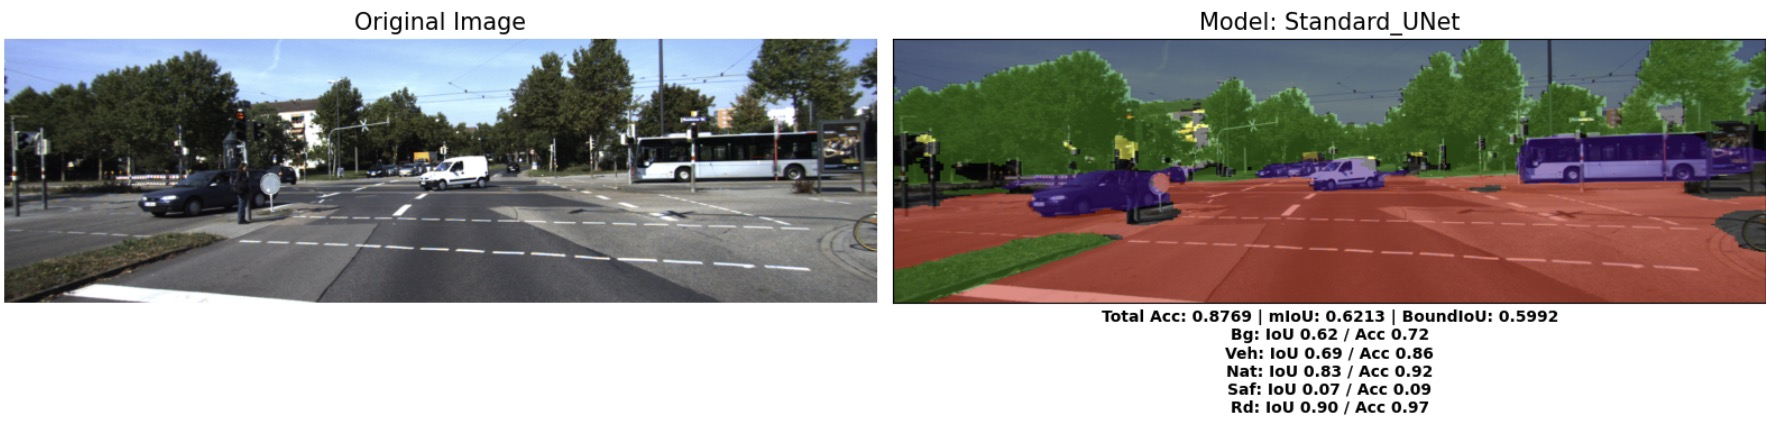
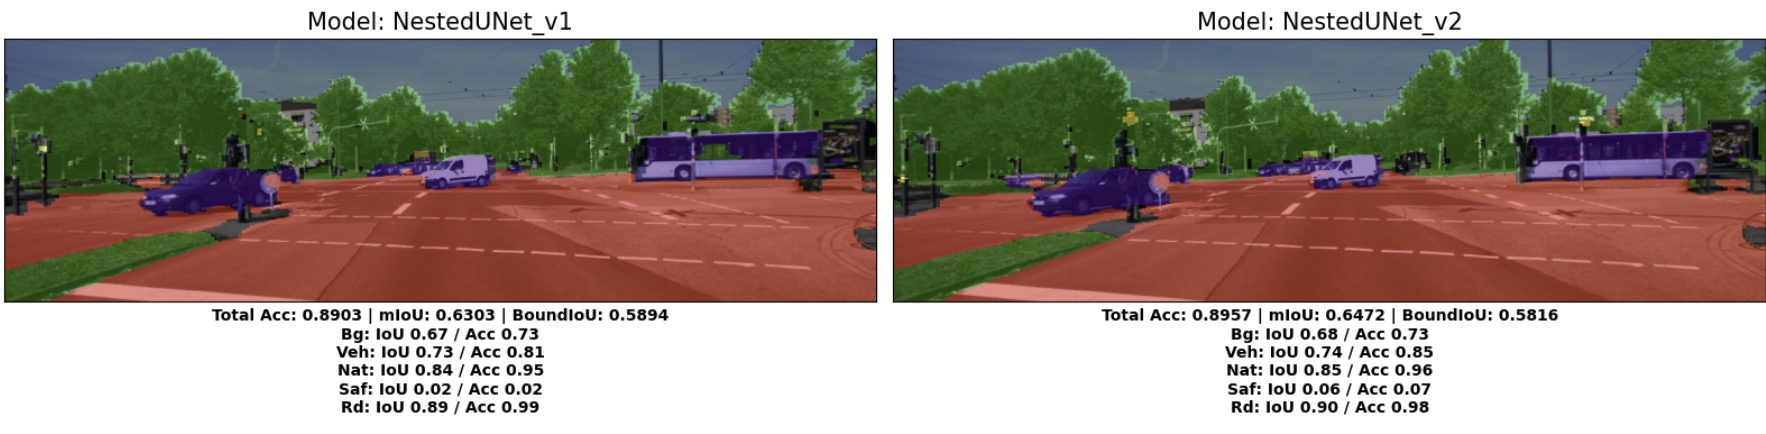

# 1. Library

In [1]:
# !mkdir -p data
# !wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
# !unzip data_semantics.zip -d data/

In [4]:
# !pip install albumentations

In [2]:
import os
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Import modularized code
from src.augmentation import build_augmentation
from src.dataset import KittiDataset
from src.model import UNet, NestedUNet
from src.loss import HybridLoss
from src.train import train_model
from src.visualization import plot_training_history, plot_class_metrics, visualize_comparison
from src.analyze_resolution import analyze_resolution

# 2. Data Aug & Hyperparameter

In [3]:
# 이건 Resolution이 224로 default가 되어있었음
# 현 train 이미지의 resolution은 어떤지 파악해봄
# 모델 구조를 안바꾸고, Aspect Ratio에 따라서 5가지 후보지 선정
# 다만 실험에서 적용하지는 못함

analyze_resolution()

Searching for images in: /home/jovyan/work/project/GoingDeeper/Quest07/data/training/image_2
Found 200 images.
------------------------------
Average Width: 1241.41
Average Height: 375.04
Average Aspect Ratio: 3.31
------------------------------
Suggested Resolutions (divisible by 32):
  544 x 160 (Aspect Ratio: 3.40)
  736 x 224 (Aspect Ratio: 3.29)
  832 x 256 (Aspect Ratio: 3.25)
  1056 x 320 (Aspect Ratio: 3.30)
  1280 x 384 (Aspect Ratio: 3.33)


In [5]:
BATCH_SIZE = 1 
NUM_EPOCHS = 50
LEARNING_RATE = 0.0001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

np.random.seed(42)
torch.manual_seed(42)

BASE_DIR = os.path.join(os.getenv("HOME"), "work/project/GoingDeeper/Quest07/data")
TRAIN_DIR = os.path.join(BASE_DIR, "training")
TEST_DIR = os.path.join(BASE_DIR, "testing")

WIDTH, HEIGHT = 224, 224

/home/jovyan/work/project/GoingDeeper/Quest07/src/augmentation.py:7: UserWarning: Argument(s) 'height, width' are not valid for transform RandomSizedCrop
  RandomSizedCrop(         # 50%의 확률로 RandomSizedCrop


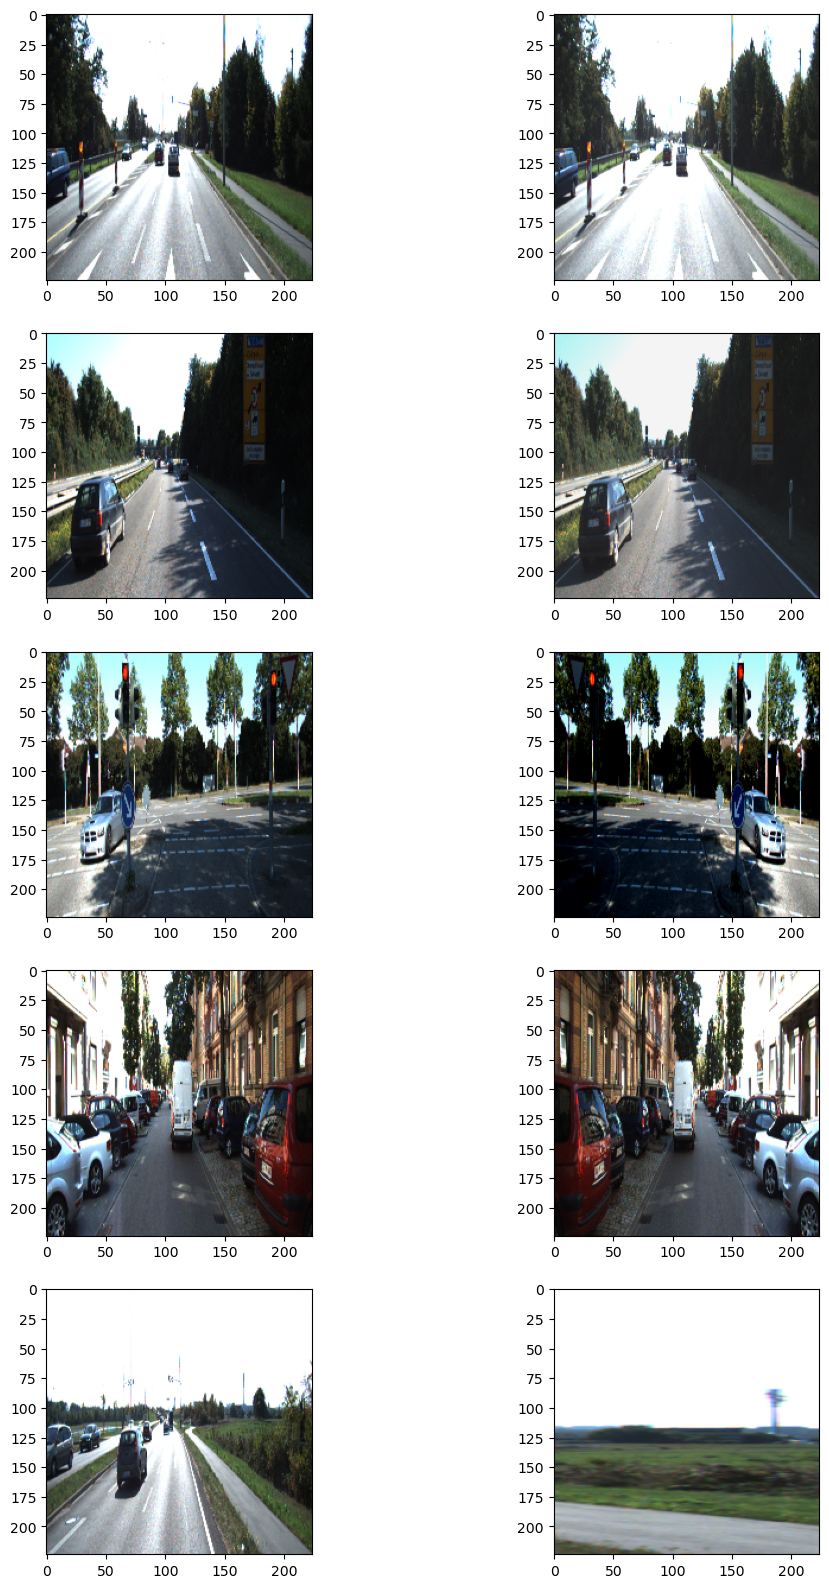

In [6]:
augmentation_train = build_augmentation(width=WIDTH, height=HEIGHT)
augmentation_test = build_augmentation(is_train=False, width=WIDTH, height=HEIGHT)
input_images = glob(os.path.join(TRAIN_DIR, "image_2", "*.png"))

# 훈련 데이터셋에서 5개만 가져와 augmentation을 적용해 봅시다.
plt.figure(figsize=(12, 20))
for i in range(5):
    image = imread(input_images[i])
    image_data = {"image":image}
    resized = augmentation_test(**image_data)
    processed = augmentation_train(**image_data)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(resized["image"])  # 왼쪽이 원본이미지
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(processed["image"])  # 오른쪽이 augment된 이미지

plt.show()

# 3. Dataset & DataLoader 

In [7]:
# Augmentations
train_aug = build_augmentation(is_train=False, width=WIDTH, height=HEIGHT)
val_aug = build_augmentation(is_train=False, width=WIDTH, height=HEIGHT)
test_preproc = build_augmentation(is_train=False, width=WIDTH, height=HEIGHT)

MULTIPLIER = 1 # 데이터 뻥튀기 배수 (학습 데이터에만 적용)

try:
    # 원본 데이터셋 기준으로 인덱스 분할 (Leakage 방지)
    base_dataset = KittiDataset(
        TRAIN_DIR,
        multiplier=1,
        augmentation=train_aug,
        is_train=True
    )
    
    dataset_size = len(base_dataset)
    indices = list(range(dataset_size))
    np.random.shuffle(indices)
    
    # Split Train/Val (원본 이미지 단위로 분할)
    split_point = int(np.floor(0.2 * dataset_size))
    val_indices_orig = indices[:split_point]
    train_indices_orig = indices[split_point:]

    # 학습 데이터셋 구성 (Multiplier 적용)
    full_train_dataset = KittiDataset(
        TRAIN_DIR,
        multiplier=MULTIPLIER,
        augmentation=train_aug,
        is_train=True
    )
    
    # 학습용 인덱스 확장 logic:
    # 원본 인덱스 i가 학습용이라면, (i, i + N, i + 2N, ...) 모두 학습용 데이터셋에 포함
    train_indices_extended = []
    for i in train_indices_orig:
        for m in range(MULTIPLIER):
            train_indices_extended.append(i + m * dataset_size)

    train_dataset = Subset(full_train_dataset, train_indices_extended)

    # 3. 검증 데이터셋 구성 (Multiplier=1 적용, 중복 제거)
    full_val_dataset = KittiDataset(
        TRAIN_DIR,
        multiplier=1,
        augmentation=val_aug,
        is_train=False
    )
    val_dataset = Subset(full_val_dataset, val_indices_orig)

    # Loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Test Dataset & Loader
    test_dataset = KittiDataset(
        TEST_DIR,
        augmentation=test_preproc,
        is_train=False
    )
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Original Total Images: {dataset_size}")
    print(f"Train size (Augmented): {len(train_dataset)} (from {len(train_indices_orig)} unique images)")
    print(f"Val size (Original): {len(val_dataset)}")

except Exception as e:
    print(f"Error loading KittiDataset: {e}")
    import traceback
    traceback.print_exc()

Original Total Images: 200
Train size (Augmented): 160 (from 160 unique images)
Val size (Original): 40


# 4. Model & Train

In [8]:
# Initialize Models
models_to_train = [
    ("Standard_UNet", UNet(input_channels=3, output_channels=5, deep_supervision=False)),
    ("NestedUNet_v1", NestedUNet(input_channels=3, output_channels=5, deep_supervision=False)),
    ("NestedUNet_v2", NestedUNet(input_channels=3, output_channels=5, deep_supervision=True))
]

criterion = HybridLoss(smooth=1.0)

ex_dir='???'

In [24]:
# Training Loop
# epoch마다 모든 정보 checkpoint 진행 - 안전장치
# valid loss 기준으로 Best Model 저장

for model_name, model in models_to_train:

    model = model.to(DEVICE)
    optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
    
    try:
        history = train_model(
            model=model,
            model_name=model_name,
            train_loader=train_loader,
            val_loader=val_loader,
            criterion=criterion,
            optimizer=optimizer,
            num_epochs=NUM_EPOCHS,
            device=DEVICE,
            experiment_dir=ex_dir,
            accumulation_steps=1 
        )
    except NameError:
        print("Skipping training as data loaders are not defined.")
    except Exception as e:
        print(f"An error occurred during training {model_name}: {e}")

# 5. Loss & Metric Visualization

Loading history for Standard_UNet...


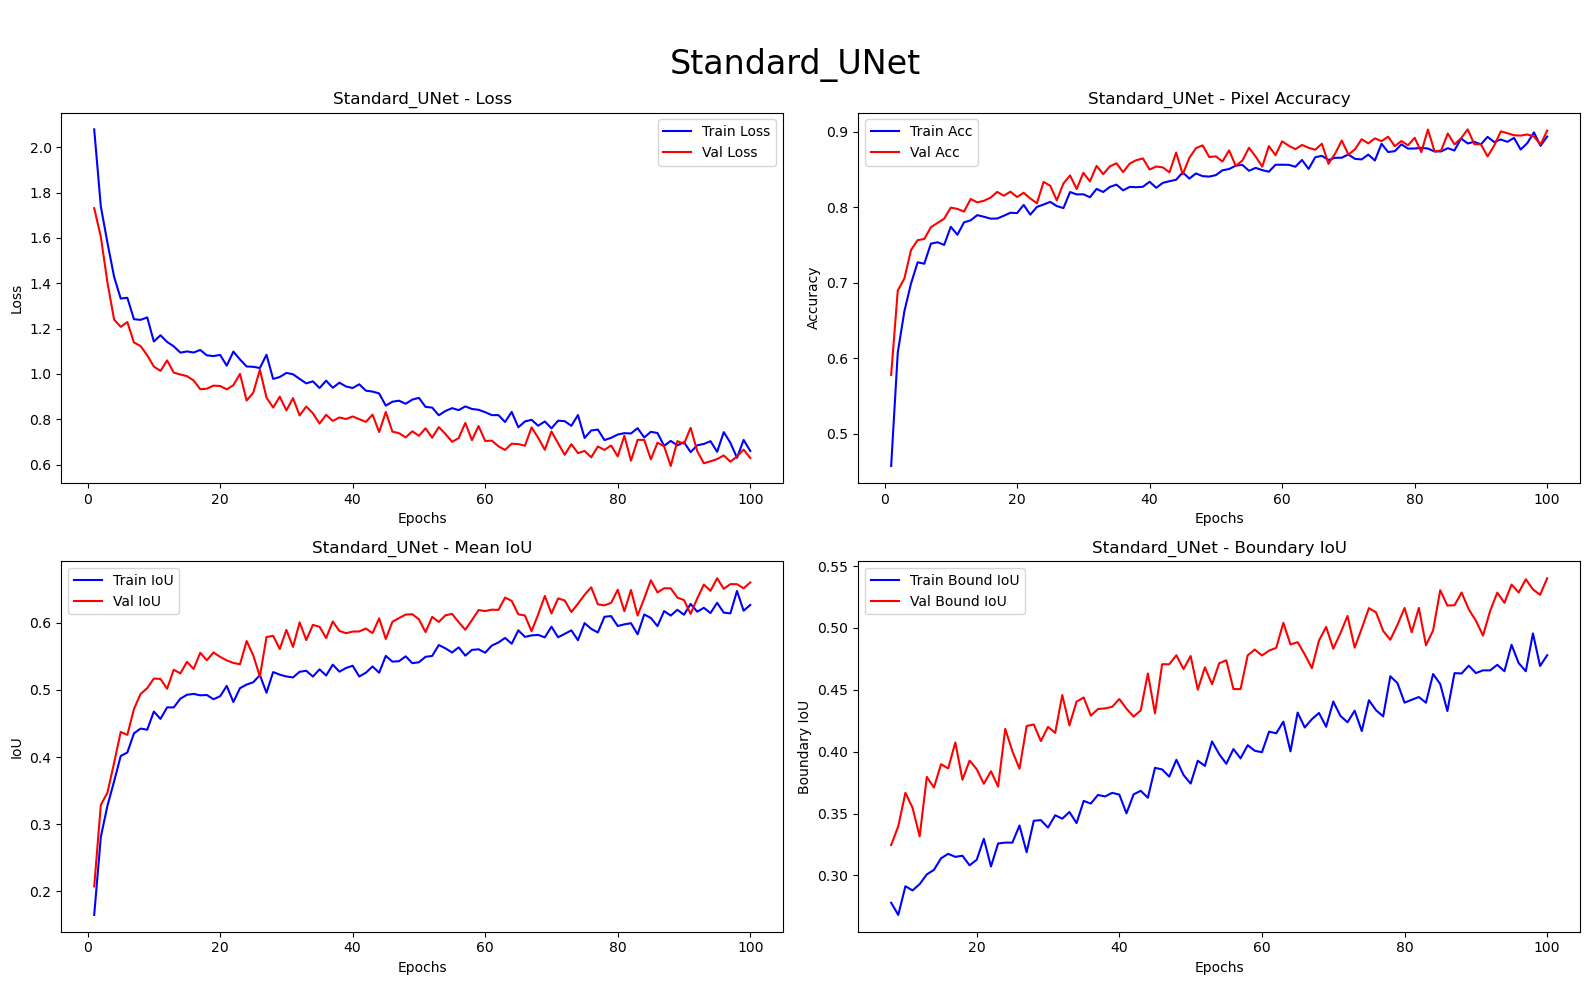

Loading history for NestedUNet_v1...


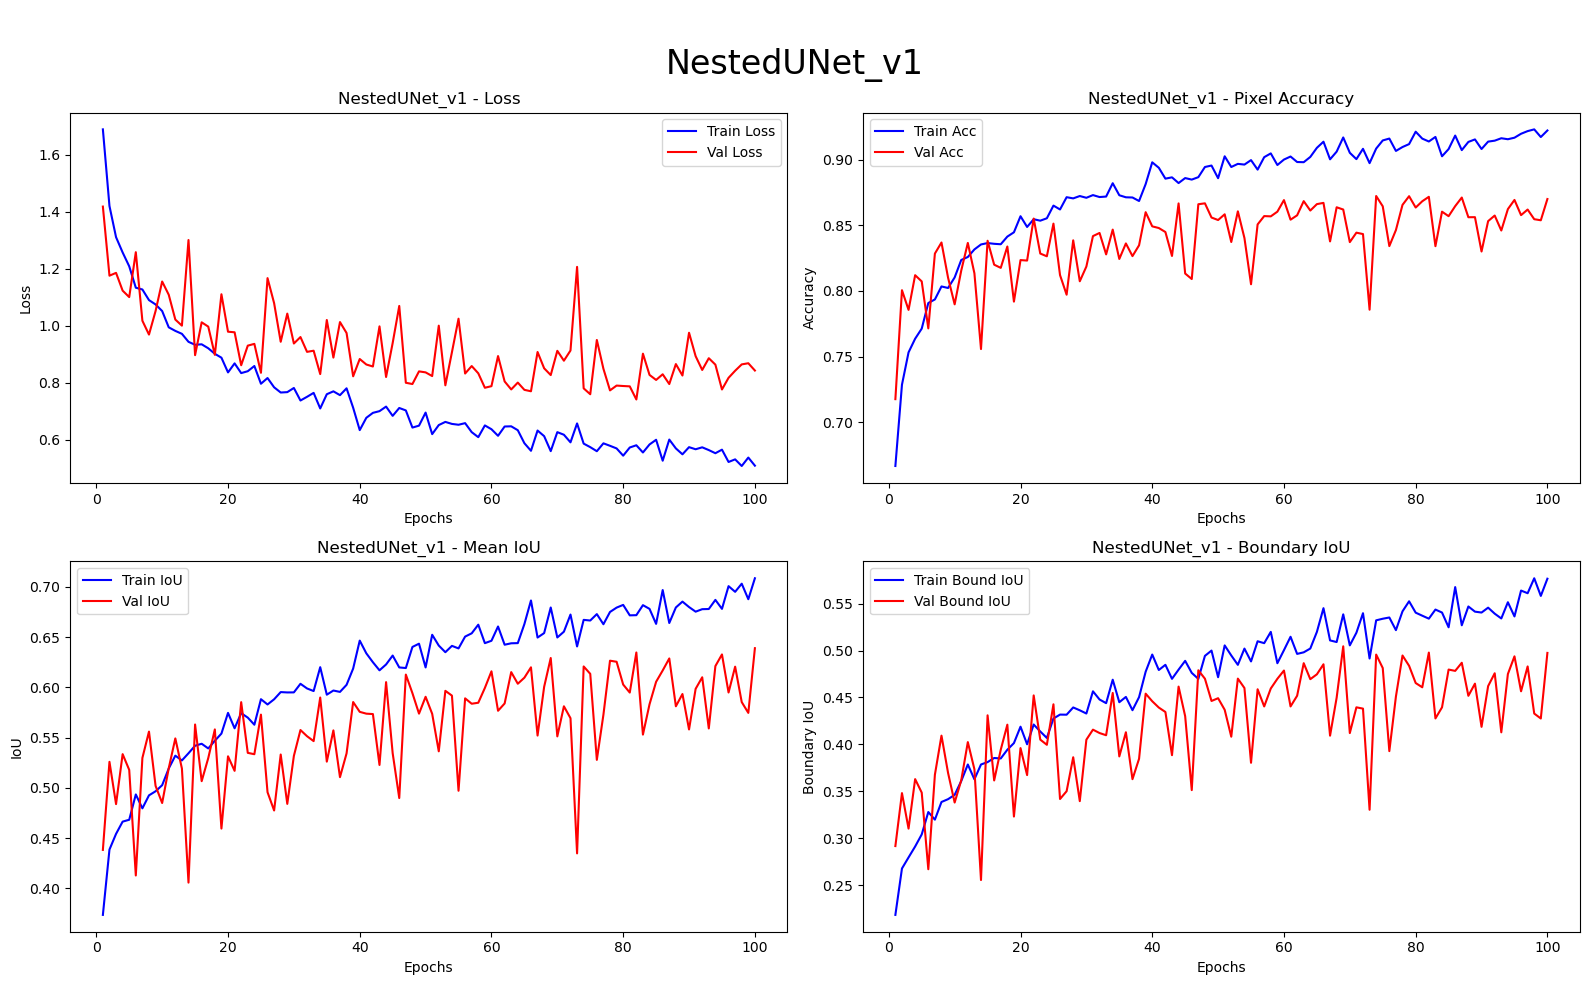

Loading history for NestedUNet_v2...


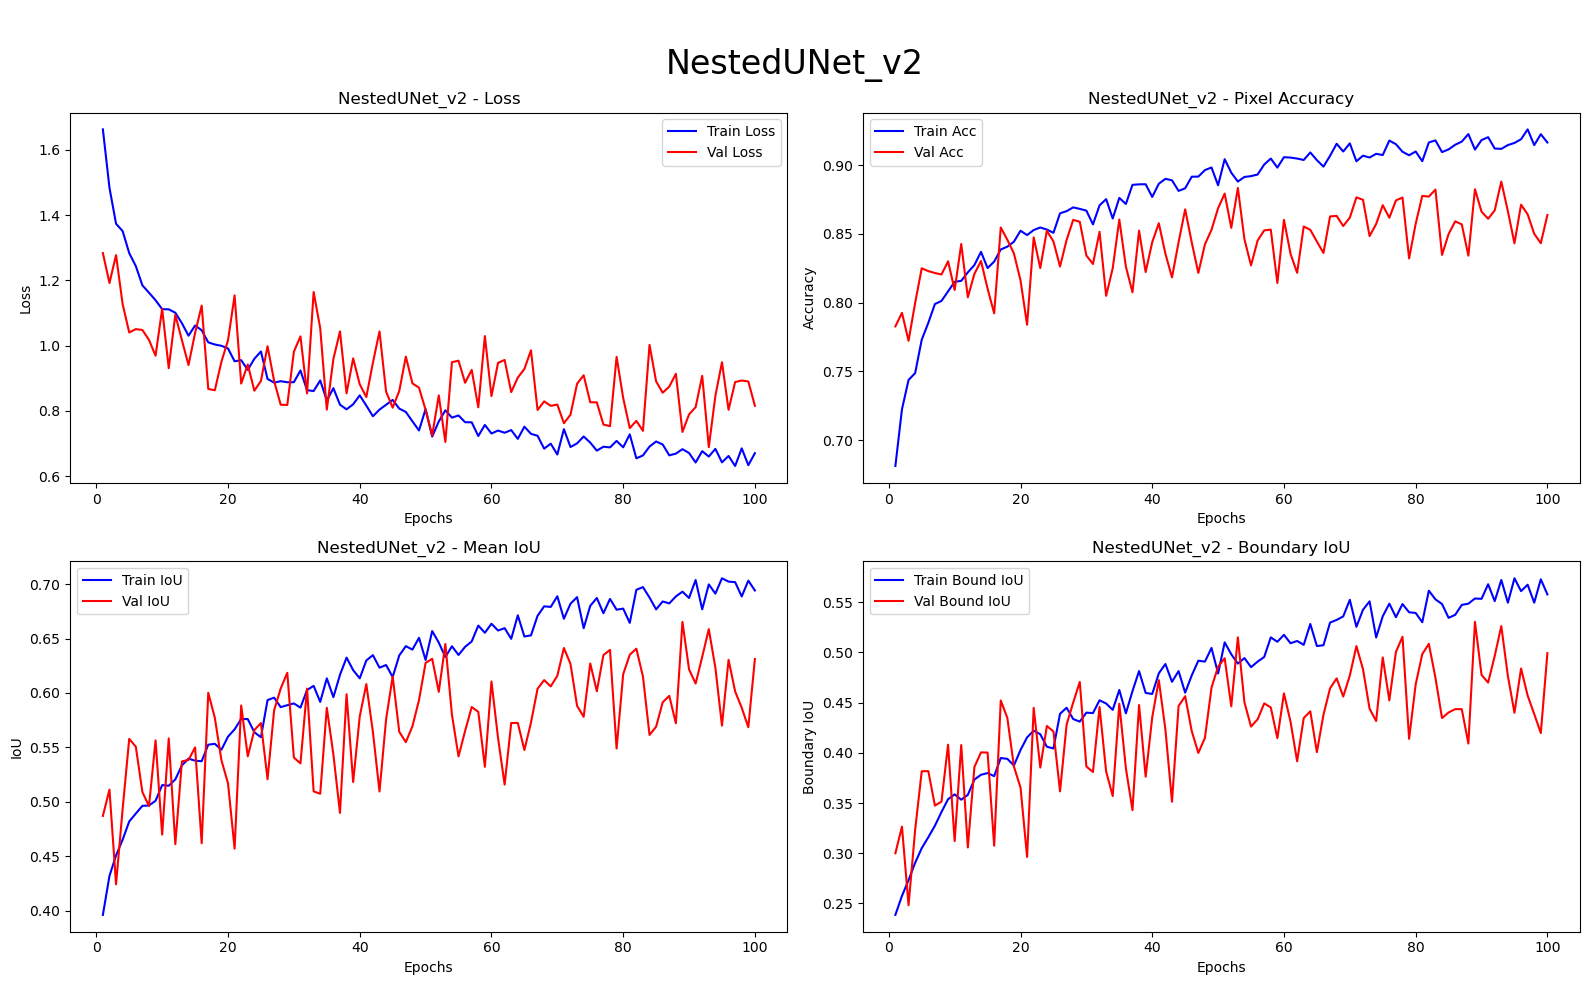

In [9]:
# Visualization Execution
ex_dir='aug2_0.0001'

# 1. Plot Training History
model_names = ["Standard_UNet", "NestedUNet_v1", "NestedUNet_v2"]

for model_name in model_names: 
    # Checkpoint path based on train_model logic
    checkpoint_path = f"model/{ex_dir}/{model_name}_checkpoint.pth"
    
    if os.path.exists(checkpoint_path):
        print(f"Loading history for {model_name}...")
        checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)
        if 'history' in checkpoint:
            history = checkpoint['history']
            plot_training_history(history, model_name)
        else:
            print(f"No history found in {checkpoint_path}")
    else:
        print(f"Checkpoint not found: {checkpoint_path}")

Loading history for Standard_UNet...


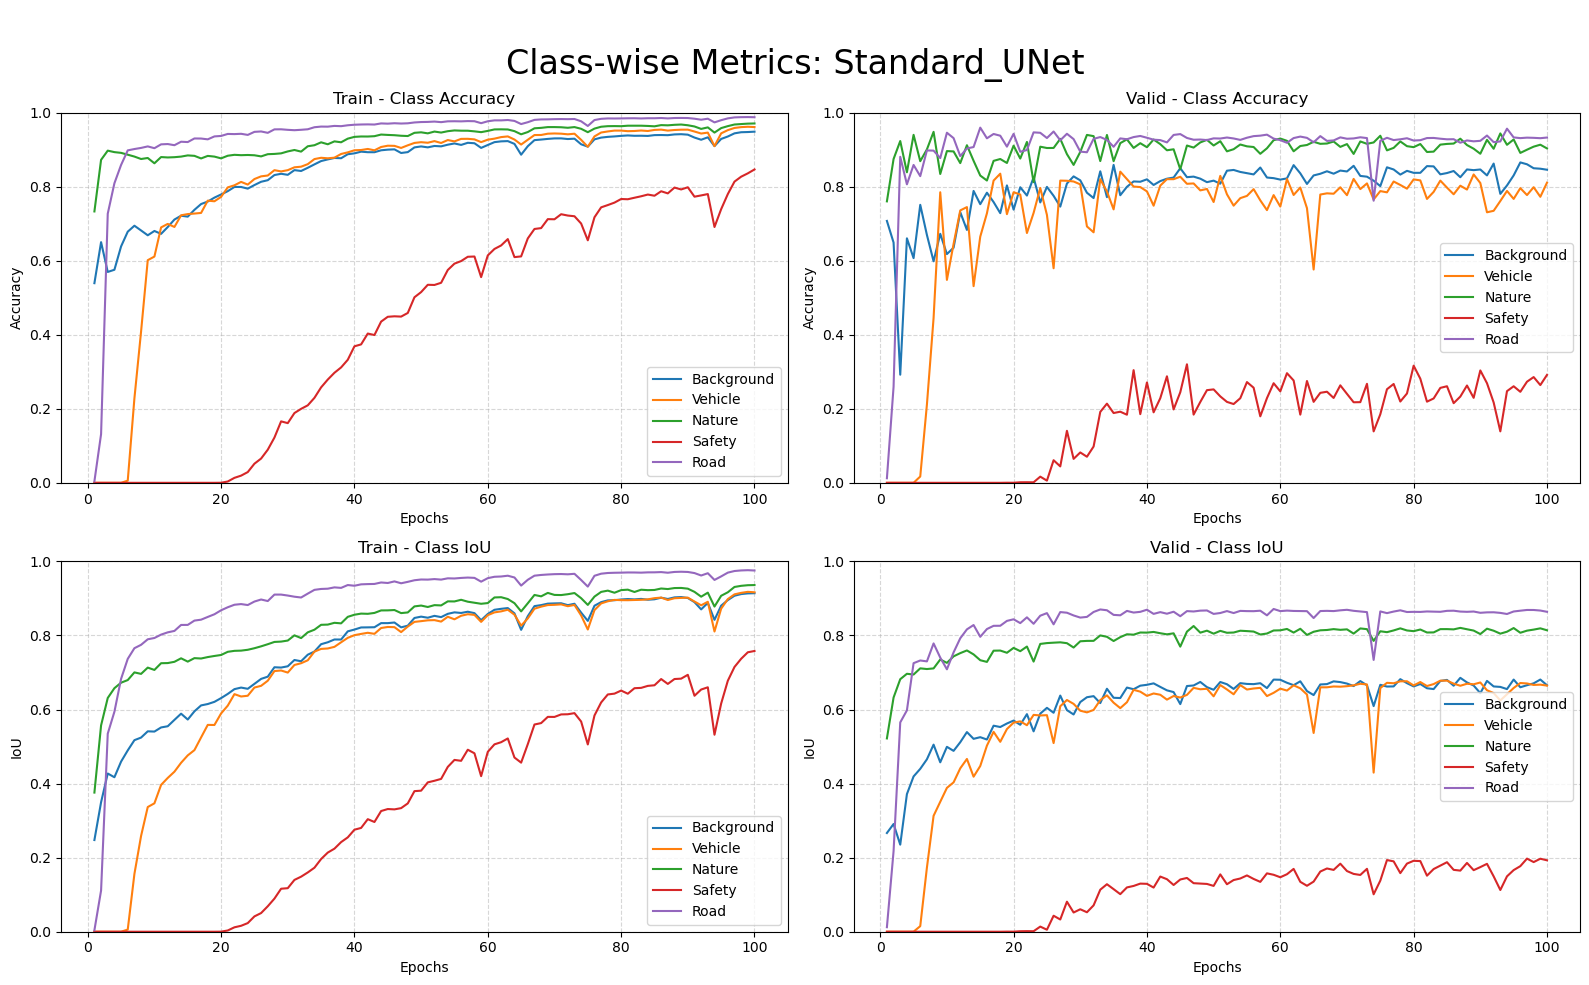

Loading history for NestedUNet_v1...


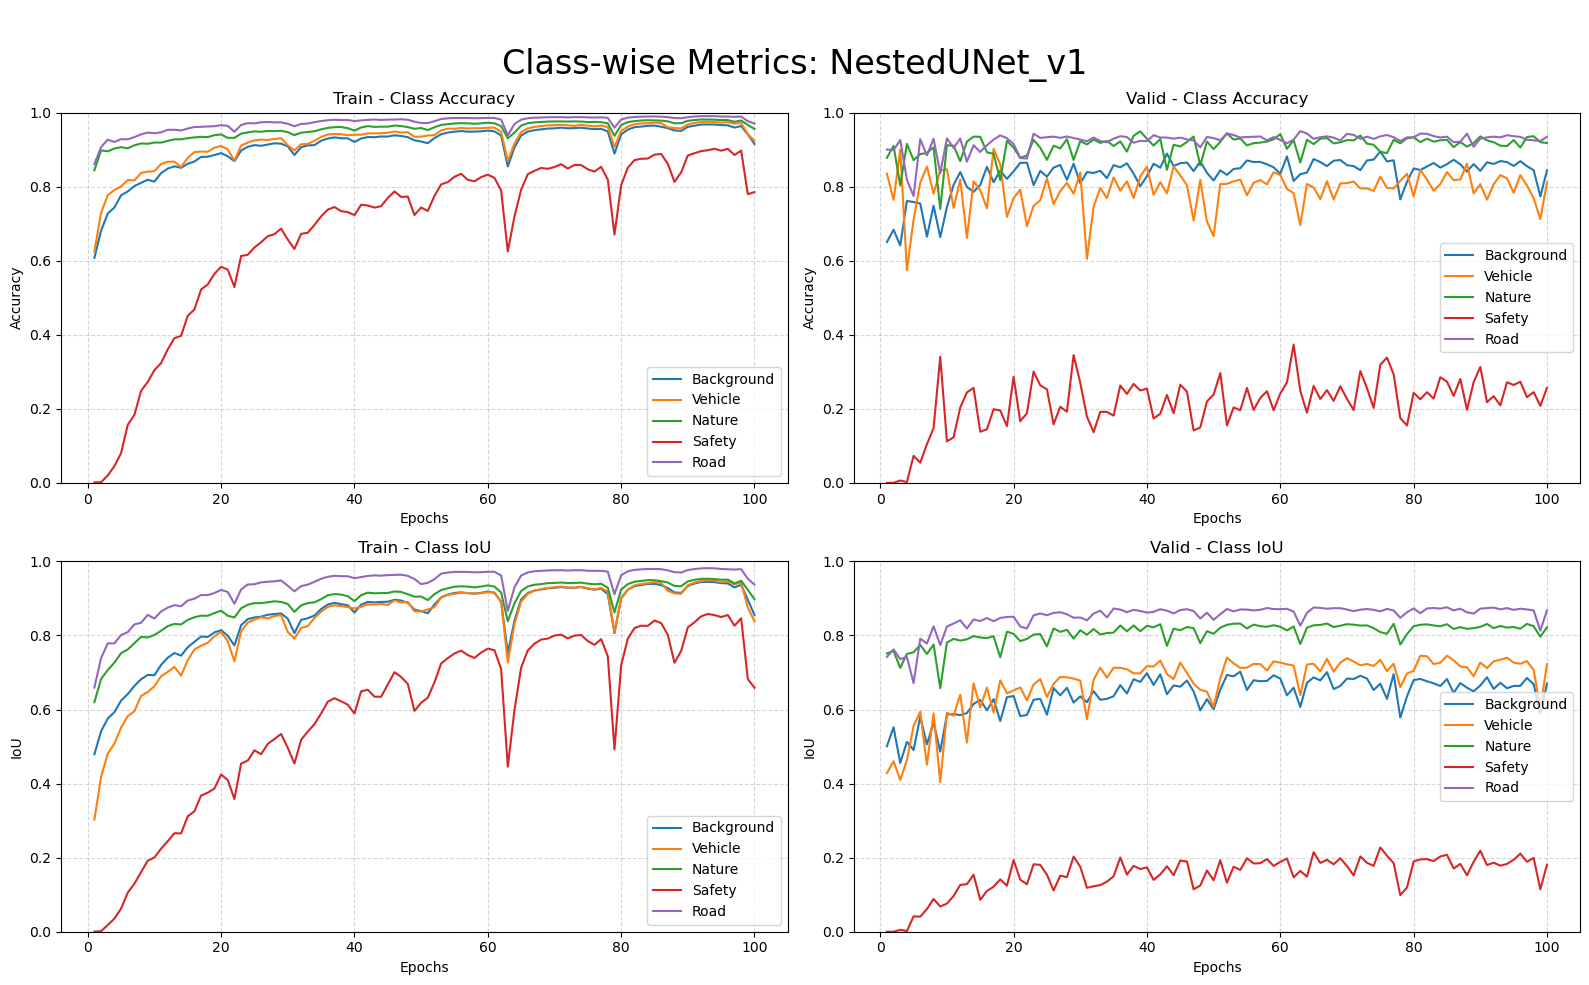

Loading history for NestedUNet_v2...


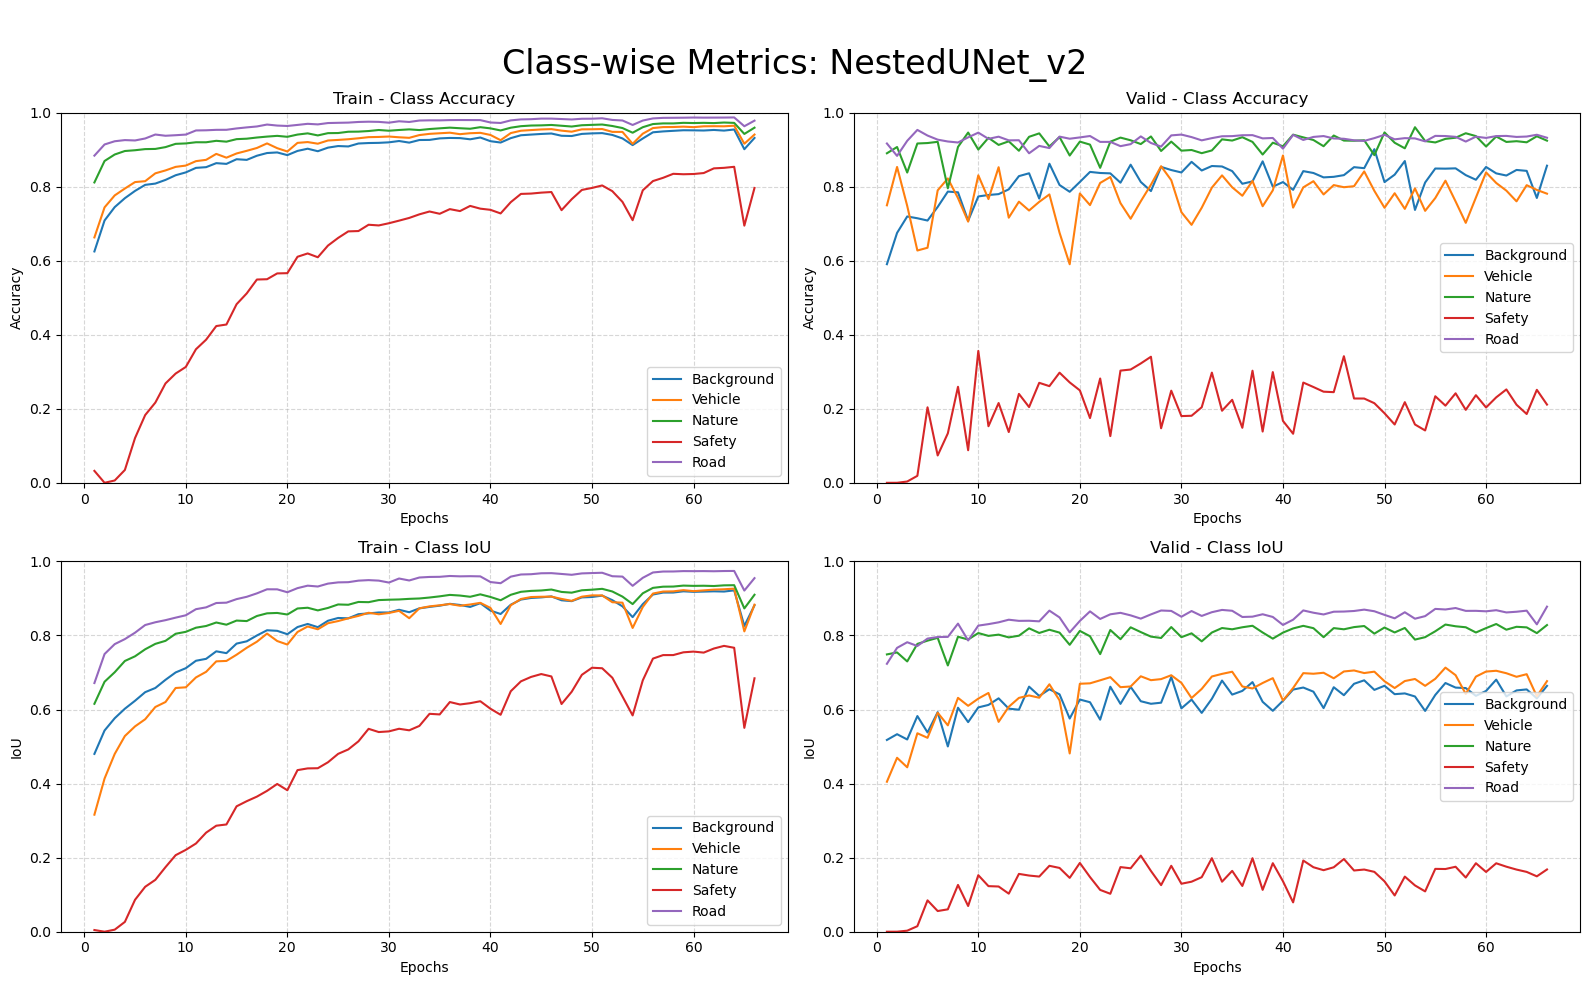

In [12]:
ex_dir="no_aug1_0.0001"


for model_name in model_names:
    # Checkpoint path based on train_model logic
    checkpoint_path = f"model/{ex_dir}/{model_name}_checkpoint.pth"
    
    if os.path.exists(checkpoint_path):
        print(f"Loading history for {model_name}...")
        checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)
        if 'history' in checkpoint:
            history = checkpoint['history']
            plot_class_metrics(history, model_name)
        else:
            print(f"No history found in {checkpoint_path}")
    else:
        print(f"Checkpoint not found: {checkpoint_path}")

# 6. Visualize Predictions

In [19]:
ex_dir="no_aug1_0.0001"
#ex_dir='aug2_0.0001'

In [20]:
# 2. Visualize Predictions
print("\nVisualizing Predictions...")

# Load Models
loaded_models = {}
for model_name, model_arch in models_to_train:
    checkpoint_path = f"model/{ex_dir}/{model_name}_best.pth"
    if os.path.exists(checkpoint_path):
        model_arch.load_state_dict(torch.load(checkpoint_path, map_location=DEVICE))
        model_arch.to(DEVICE)
        model_arch.eval()
        loaded_models[model_name] = model_arch
    else:
        print(f"Best model not found for {model_name}")


Visualizing Predictions...


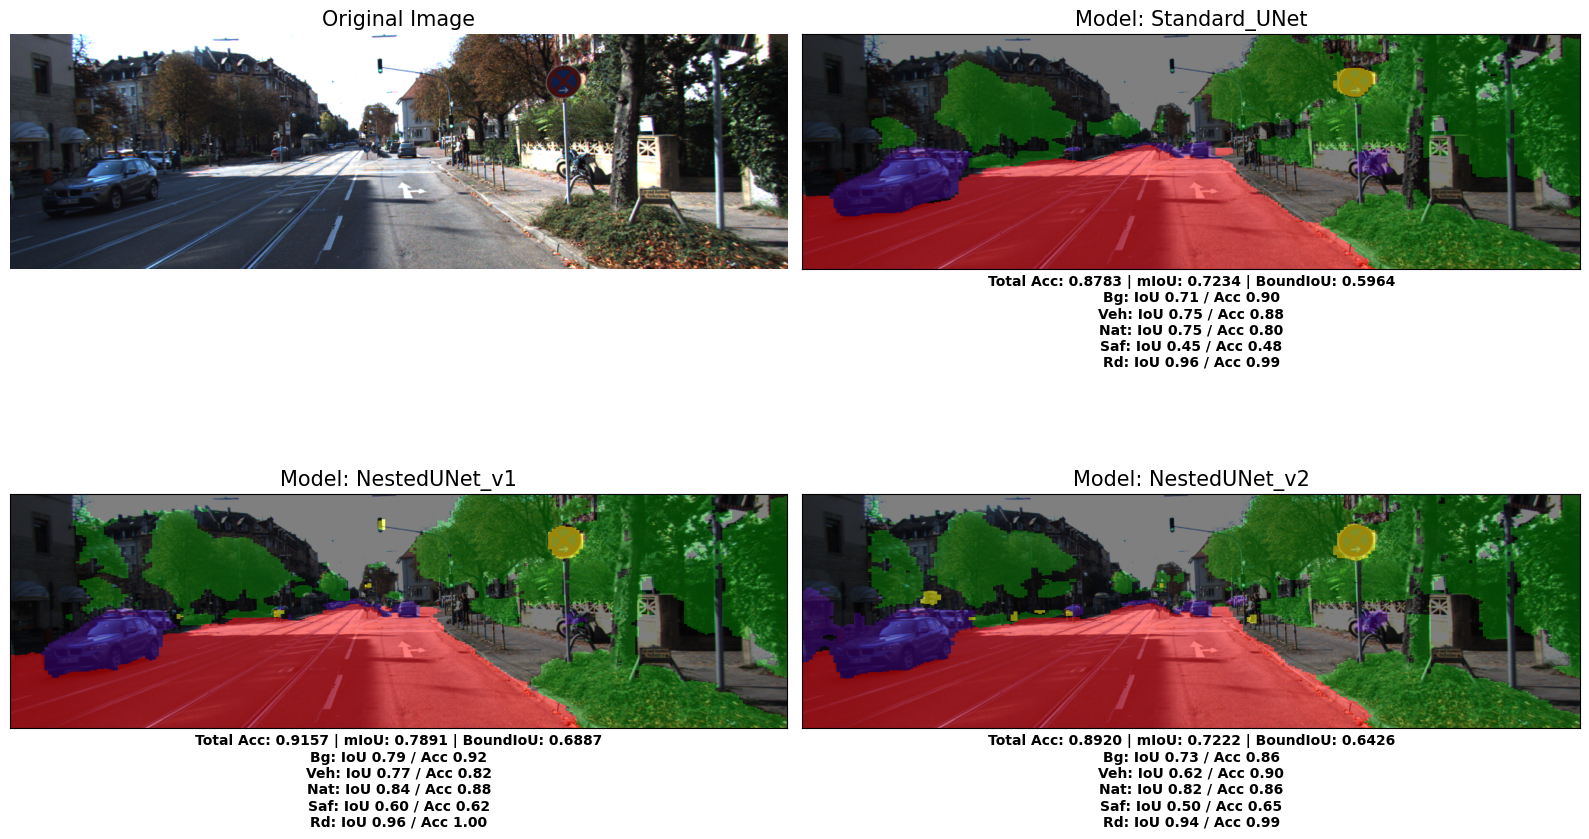

In [21]:
# 모든 모델의 예측 결과를 하나의 샘플 이미지에 대해 시각화합니다.
i = 1 # 테스트할 이미지 인덱스를 변경할 수 있습니다.
visualize_comparison(
    loaded_models,
    test_preproc,
    image_path=TRAIN_DIR + f'/image_2/00{str(i).zfill(4)}_10.png'
)
# ========================================
#  [Class Color Legend]
#   Background (0): RGB (0, 0, 0)
#   Vehicle (1): RGB (64, 0, 128)
#   Nature (2): RGB (0, 128, 0)
#   Safety (3): RGB (255, 255, 0)
#   Road (4): RGB (255, 0, 0)
# ========================================


In [22]:
print(indices[:split_point])

[95, 15, 30, 158, 128, 115, 69, 170, 174, 45, 66, 182, 165, 78, 186, 177, 56, 152, 82, 68, 124, 16, 148, 93, 65, 60, 84, 67, 125, 132, 9, 18, 55, 75, 150, 104, 135, 137, 164, 76]


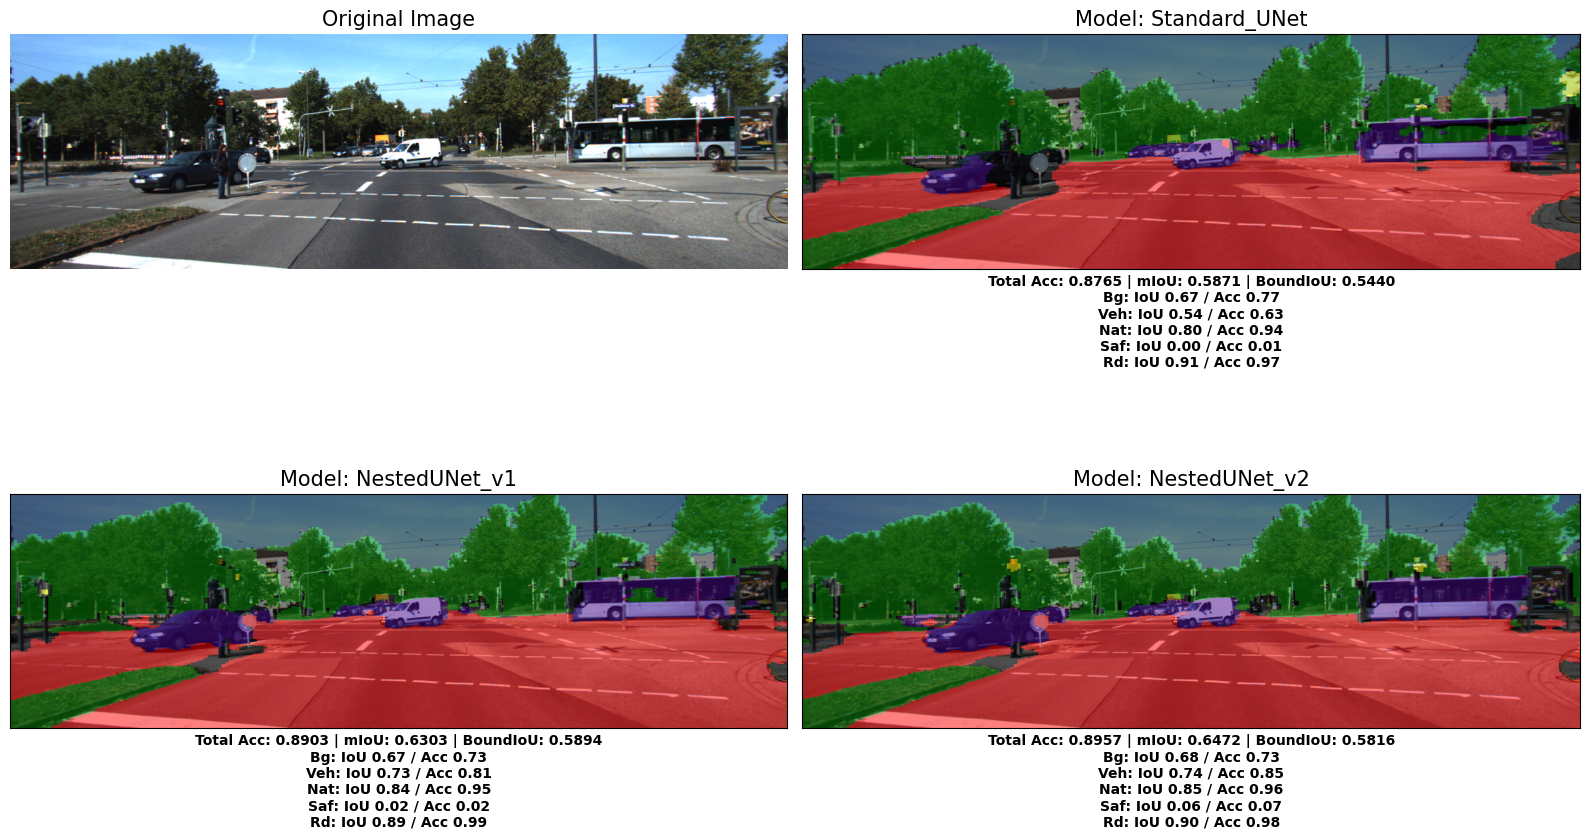

In [23]:
# indices[:split_point] -> Valid data

# 모든 모델의 예측 결과를 하나의 샘플 이미지에 대해 시각화합니다.
i = 15 # 테스트할 이미지 인덱스를 변경할 수 있습니다.
visualize_comparison(
    loaded_models,
    test_preproc,
    image_path=TRAIN_DIR + f'/image_2/00{str(i).zfill(4)}_10.png'
)
# ========================================
#  [Class Color Legend]
#   Background (0): RGB (0, 0, 0)
#   Vehicle (1): RGB (64, 0, 128)
#   Nature (2): RGB (0, 128, 0)
#   Safety (3): RGB (255, 255, 0)
#   Road (4): RGB (255, 0, 0)
# ========================================
